<a href="https://colab.research.google.com/github/Kofoworola13/DSS/blob/main/Credit_Card_Approval_Classification_ML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Introduction and Overview**

#### **Project Title**
**Machine Learning: Credit Card Approval Classification**

#### **Project Introduction**
In today's competitive financial landscape, efficiently processing credit card applications is crucial for both financial institutions and their clients. This project aims to leverage machine learning techniques to develop a robust binary classification model that can predict the approval or rejection of credit card applications. By analyzing a range of features related to applicants' demographics, financial status, and contact information, the model will help streamline decision-making processes, enhance customer experience, and minimize the risk associated with credit approvals.

#### **Project Objective**
The primary objective of this project is to build a binary classification model capable of achieving an accuracy score of at least 70%. The model will forecast whether a credit card application is likely to be approved or rejected based on the provided features. These features include personal and financial information, which are expected to provide insights into the factors influencing the approval process.

#### **Steps Involved**

1. **Project Setup:**
   - Define project objectives and goals.
   - Gather and review data, including understanding the data dictionary and identifying any initial issues or inconsistencies.

2. **Data Collection:**
   - Acquire the dataset containing relevant features and target variable.
   - Ensure the dataset is comprehensive and representative of the problem domain.

3. **Data Exploration and Preprocessing:**
   - **Exploratory Data Analysis (EDA):** Analyze the dataset to understand distributions, correlations, and patterns. Visualize key features and relationships.
   - **Data Cleaning:** Handle missing values, remove duplicates, and correct inconsistencies. Standardize or normalize data as needed.
   - **Feature Engineering:** Create new features or transform existing ones to improve model performance. Encode categorical variables and scale numerical features.
   - **Data Splitting:** Divide the dataset into training and testing sets to evaluate model performance. Typically, a validation set is also used to fine-tune model parameters.

4. **Model Selection and Training:**
   - **Choose Models:** Select appropriate machine learning algorithms for binary classification (e.g., Logistic Regression, Decision Trees, Random Forest, SVM, etc.).
   - **Train Models:** Use the training dataset to fit the selected models. Adjust hyperparameters and perform model tuning to optimize performance.
   - **Evaluate Models:** Assess model performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Utilize cross-validation to ensure robustness.

5. **Model Evaluation and Validation:**
   - **Testing:** Evaluate the model on the test dataset to measure how well it generalizes to unseen data.
   - **Validation:** Use additional validation techniques to assess model stability and performance under different conditions.

6. **Model Deployment:**
   - **Integration:** Prepare the model for deployment in a production environment. This may involve converting the model to a compatible format or integrating it with existing systems.
   - **Monitoring:** Continuously monitor model performance to ensure it remains accurate and relevant. Implement feedback mechanisms for ongoing improvements.

7. **Documentation and Reporting:**
   - **Documentation:** Document the entire process, including data preparation, model selection, and performance metrics. Provide clear explanations of methods and results.
   - **Reporting:** Create comprehensive reports and visualizations to communicate findings and insights to stakeholders. Highlight key results, implications, and recommendations.

8. **Review and Reflection:**
   - **Review:** Assess the overall project outcomes and evaluate whether the objectives were met.
   - **Reflection:** Reflect on lessons learned, challenges faced, and potential areas for future work or improvements.

By following these steps, we will systematically approach the development of a credit card approval classification model, ensuring a thorough and effective process from data collection to model deployment.

## **Dataset Information**

### **Source of the Data**
- **Source:** The datasets are sourced from Kaggle.
- **Link to Dataset:** [Credit Card Details by Rohit Udageri](https://www.kaggle.com/datasets/rohitudageri/credit-card-details)

The project dataset consists of two separate CSV files:

1. **Credit_card.csv**
   - **Description:** Contains various features related to credit card applicants. These features include demographic information, financial status, and contact details.
   - **Common Column:** `Ind_ID` (Unique identifier for each client)

2. **Credit_card_label.csv**
   - **Description:** Contains the target variable (label) indicating whether the credit card application was approved or rejected, along with the client ID.
   - **Common Column:** `Ind_ID` (Unique identifier for each client)

#### **Data Dictionary**
- **Ind_ID:** Unique identifier for each client.
- **Gender:** Gender of the applicant.
- **Car_owner:** Indicator of whether the applicant owns a car.
- **Propert_owner:** Indicator of property ownership.
- **Children:** Number of children the applicant has.
- **Annual_income:** Applicant's annual income.
- **Type_Income:** Classification of the income type (e.g., salary, business).
- **Education:** Highest level of education attained by the applicant.
- **Marital_status:** Marital status of the applicant.
- **Housing_type:** Type of housing (e.g., owned, rented).
- **Birthday_count:** Count of days from the applicant's last birthday to the current day (0 indicates today, -1 indicates yesterday).
- **Employed_days:** Number of days since the applicant's employment started, with positive values indicating unemployment.
- **Mobile_phone:** Indicator of whether the applicant has a mobile phone.
- **Work_phone:** Indicator of whether the applicant has a work phone.
- **Phone:** Indicator of whether the applicant has any phone number.
- **EMAIL_ID:** Indicator of whether the applicant has an email ID.
- **Type_Occupation:** Applicant's occupation type.
- **Family_Members:** Number of family members.
- **Label:** Target variable where 0 indicates application approval and 1 indicates application rejection.


# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Combining the Datasets

Before proceeding with further analysis, I will join the two datasets into a single DataFrame using the common column. This will allow me to work with all features and the target variable in one dataset.

In [ ]:
# 1. Load the datasets
URL_features = "https://github.com/Kofoworola13/DSS/raw/main/datasets/Credit_card.csv"
URL_label = "https://github.com/Kofoworola13/DSS/raw/main/datasets/Credit_card_label.csv"

features_df = pd.read_csv(URL_features)
labels_df = pd.read_csv(URL_label)

In [ ]:
# 2. Display the first few rows and column names of both datasets
features_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
labels_df.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
features_df.shape

(1548, 18)

In [ ]:
labels_df.shape

(1548, 2)

## 3. Merge the Dataset
I will perform an outer merge operation using the common columns. An outer merge combines rows from both datasets, including all rows from both sides and filling in missing values with `NaN` where there are no matches. This type of join ensures that no data is lost from either dataset during the merge process.

In [ ]:
# Merge the datasets on the common key 'Ind_ID'
credit_df = pd.merge(features_df, labels_df, on='Ind_ID', how='outer')

# Display the first few rows of the merged dataset
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
# Display the dimensions and column names of the merged dataset
print(f'The credit_df dataset is made up of {credit_df.shape[0]} intances or rows and {credit_df.shape[1]} columns')

The credit_df dataset is made up of 1548 intances or rows and 19 columns


The two datasets have been successfully combined into one. I will continue analysis on this merged version.

# Examining the Dataset

In this section, I will be looking into the dataset structure to understand it. And to also indentify any data quality issues to be fixed.

In [ ]:
# Display data types and info
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
# Display missing values
credit_df.isnull().sum()

,0
Ind_ID,0
GENDER,7
Car_Owner,0
Propert_Owner,0
CHILDREN,0
Annual_income,23
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0


In [ ]:
# Display summary statistics for numerical features
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ind_ID,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.00,5150412.0
CHILDREN,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.00,14.0
Annual_income,1525.0,1.913993e+05,113252.997656,33750.0,121500.00,166500.0,225000.00,1575000.0
Birthday_count,1526.0,-1.604034e+04,4229.503202,-24946.0,-19553.00,-15661.5,-12417.00,-7705.0
Employed_days,1548.0,5.936469e+04,137808.062701,-14887.0,-3174.50,-1565.0,-431.75,365243.0
Mobile_phone,1548.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
Work_Phone,1548.0,2.080103e-01,0.406015,0.0,0.00,0.0,0.00,1.0
Phone,1548.0,3.094315e-01,0.462409,0.0,0.00,0.0,1.00,1.0
EMAIL_ID,1548.0,9.237726e-02,0.289651,0.0,0.00,0.0,0.00,1.0
Family_Members,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.00,15.0


**Summary of Numerical Features**

The `Ind_ID` ranges from 5,008,827 to 5,150,412, indicating unique identifiers for each client. The average number of children is 0.41, with most individuals having 0 or 1 child, though there is a maximum value of 14, which may be an outlier. The annual income varies significantly, with an average of 191,399.3, and a maximum income of 1,575,000, suggesting potential outliers.

The `Birthday_count` and `Employed_days` columns provide backward counts, with average values of -16,040.34 and 59,364.69 days, respectively, but the high maximum value in `Employed_days` indicates possible data errors or outliers. Nearly all individuals have a mobile phone, but only 20.8% have a work phone, and 9.2% have an email ID registered.

Finally, the `label` column shows that approximately 11.3% of credit card applications were rejected.


In [ ]:
# Summary statistics categorical features
credit_df.describe(include='object').T

,count,unique,top,freq
GENDER,1541,2,F,973
Car_Owner,1548,2,N,924
Propert_Owner,1548,2,Y,1010
Type_Income,1548,4,Working,798
EDUCATION,1548,5,Secondary / secondary special,1031
Marital_status,1548,5,Married,1049
Housing_type,1548,6,House / apartment,1380
Type_Occupation,1060,18,Laborers,268


**Summary of Categorical Features**

The dataset includes several categorical features with varying distributions:

- **Gender:** The dataset comprises 1,541 records with gender information. The majority (973) are females, making up the dominant category.
- **Car Ownership:** Out of 1,548 records, 924 individuals do not own a car (`N`), while 624 do.
- **Property Ownership:** Among the 1,548 records, 1,010 individuals own property (`Y`), making it the more common category.
- **Income Type:** The dataset contains four income types, with "Working" being the most frequent (798 occurrences).
- **Education:** There are five levels of education, with "Secondary / secondary special" being the most common (1,031 occurrences).
- **Marital Status:** The majority of the individuals are married (1,049 out of 1,548 records).
- **Housing Type:** Most individuals live in a "House / apartment" (1,380 occurrences).
- **Occupation Type:** The dataset has 18 different occupations, with "Laborers" being the most frequent (268 out of 1,060 records).


Ind_ID skewness:
0.0723457206631939


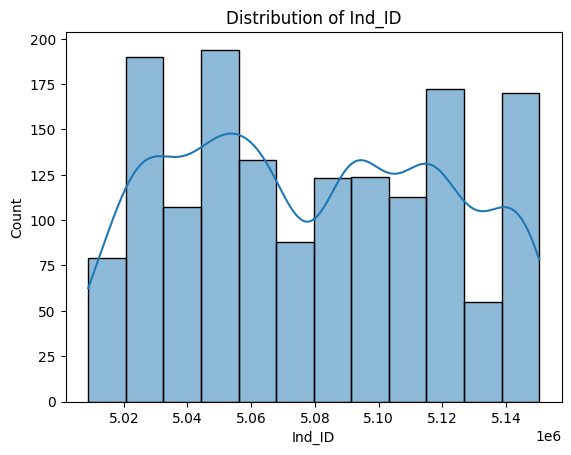


CHILDREN skewness:
4.631121894695182


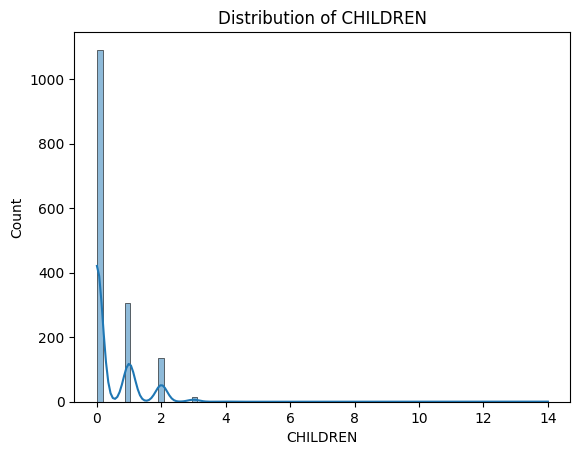


Annual_income skewness:
3.9245642452364167


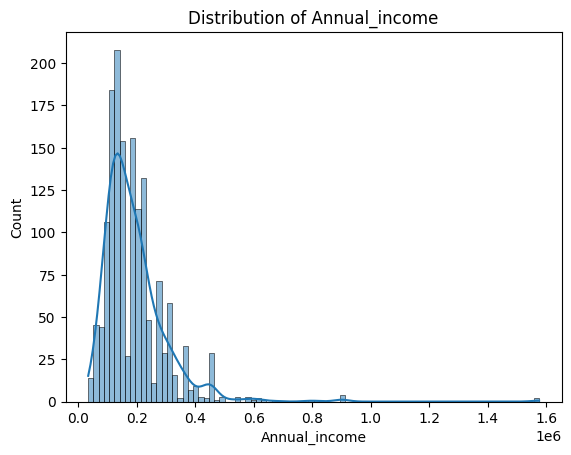


Birthday_count skewness:
-0.17108666821145055


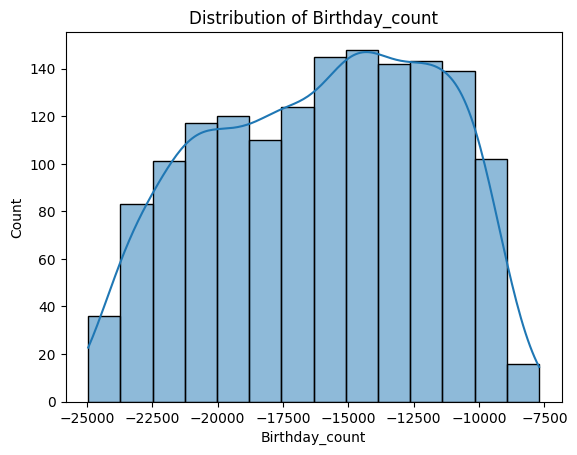


Employed_days skewness:
1.770964333419757


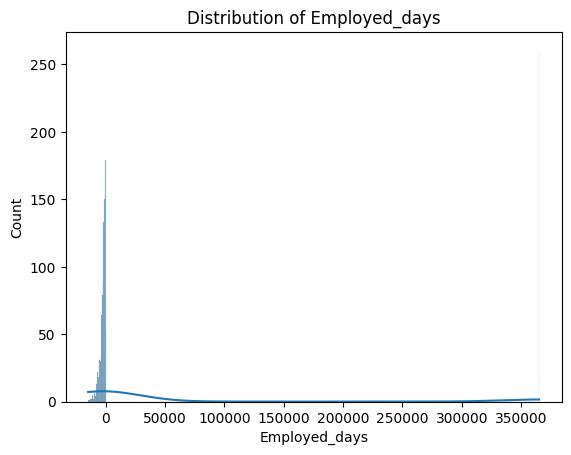


Mobile_phone skewness:
0.0


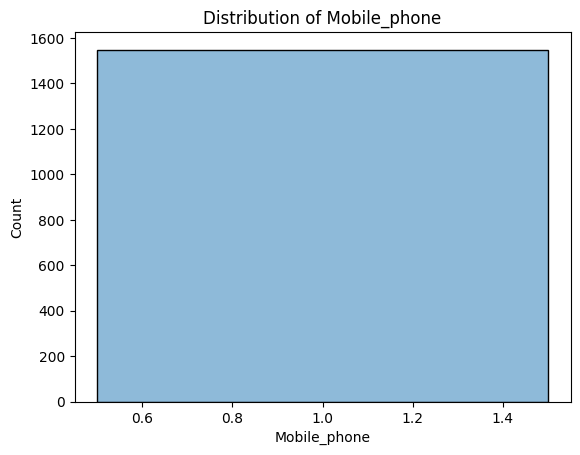


Work_Phone skewness:
1.4401787712531133


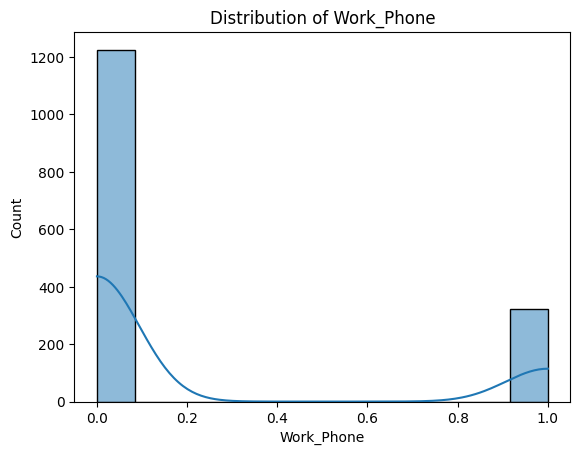


Phone skewness:
0.8253089366272789


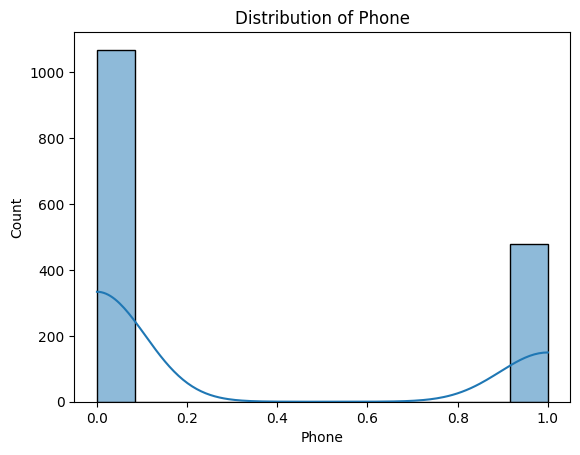


EMAIL_ID skewness:
2.818216280851602


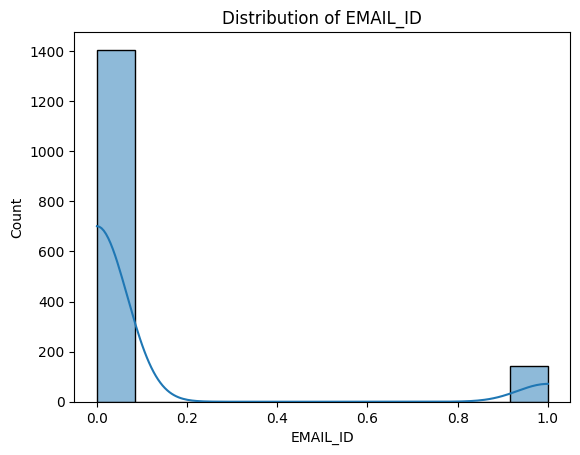


Family_Members skewness:
2.2322733446463294


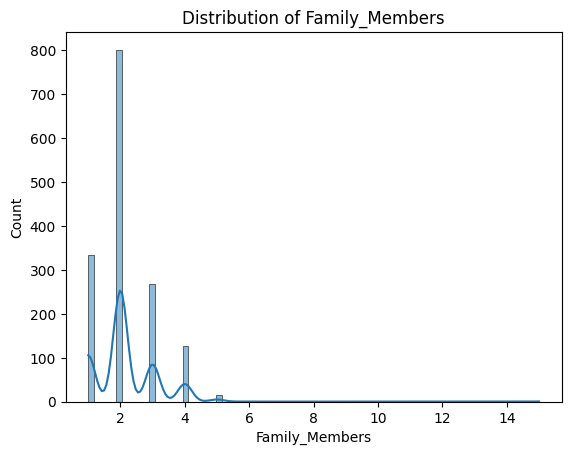


label skewness:
2.4463786084073944


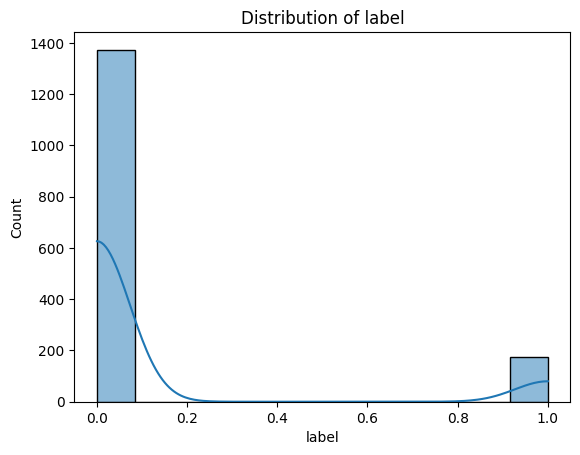

In [ ]:
# Plot histograms for numerical features
numerical_features = credit_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    print(f"\n{feature} skewness:")
    print(credit_df[feature].skew())
    sns.histplot(credit_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


**Summary of the Distributions**

The majority of the features, such as **work_phone, family_members, email_id, annual_income, and children**, are positively skewed, reflecting right-skewed distributions. However, a few features show negative skewness. The **mobile_phone** feature stands out as symmetric, with a skewness of 0.

The target **label** is also highly positively skewed, with a skewness value of 2.44. This suggests a significant class imbalance, which could potentially impact model training and performance.

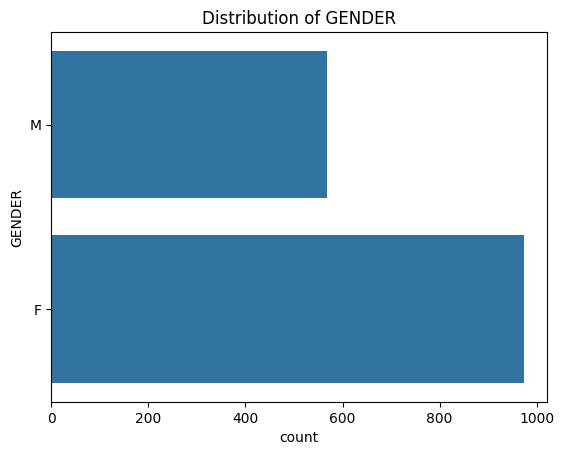

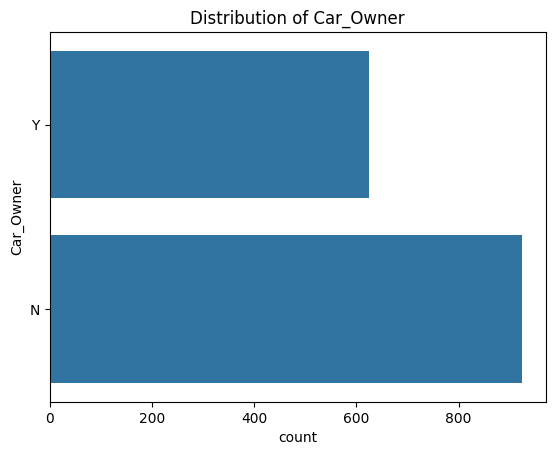

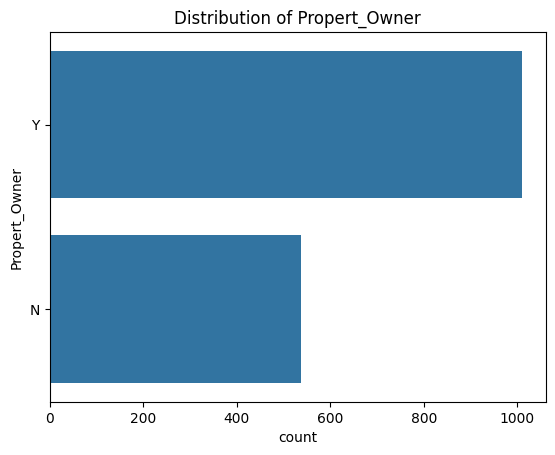

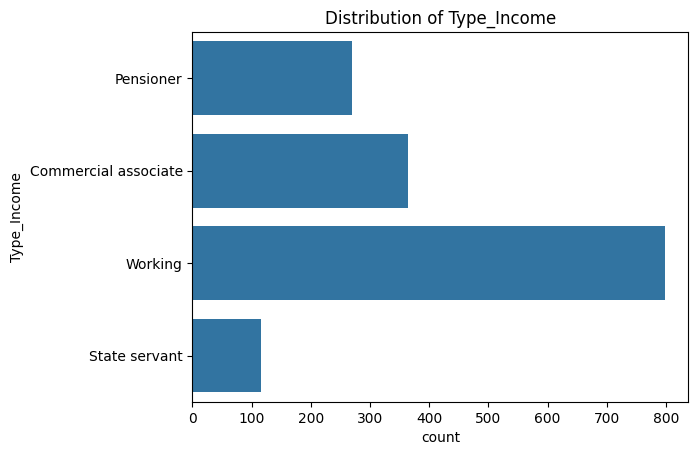

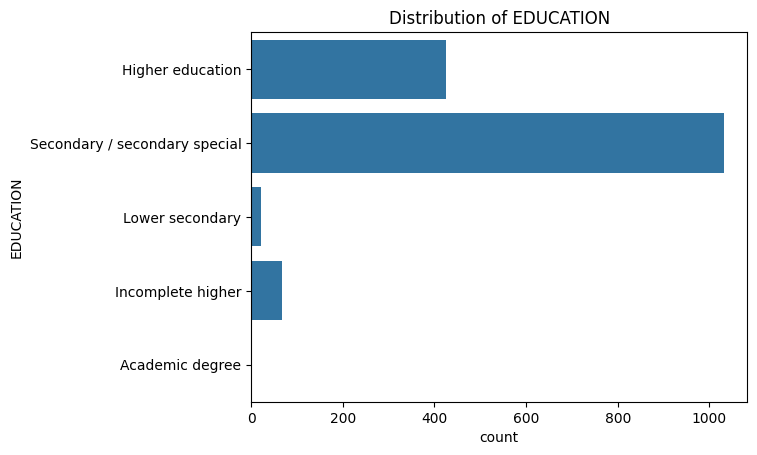

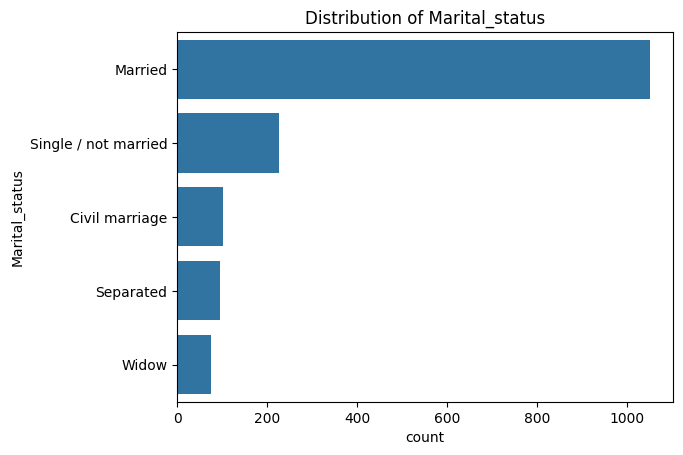

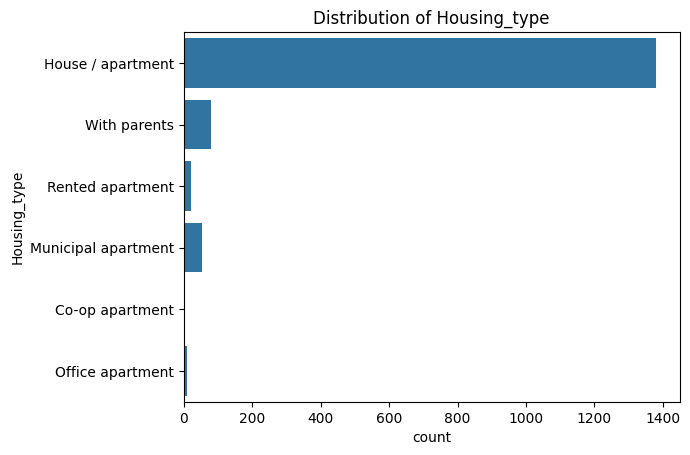

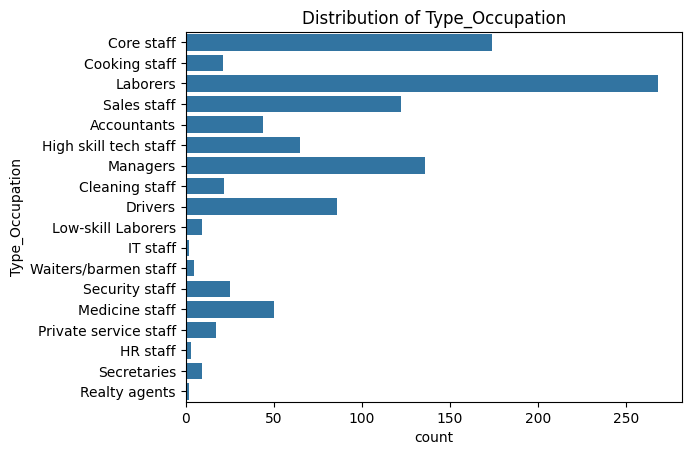

In [ ]:
# Plot count plots for categorical features
categorical_features = credit_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    sns.countplot(y=credit_df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

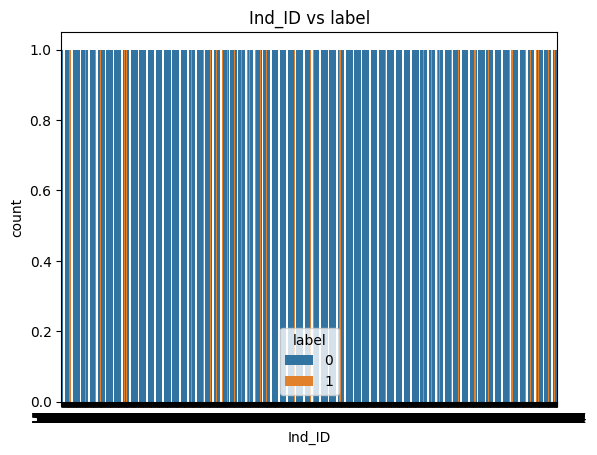

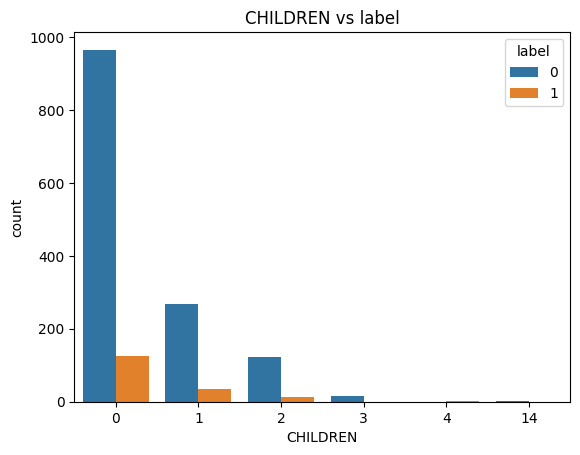

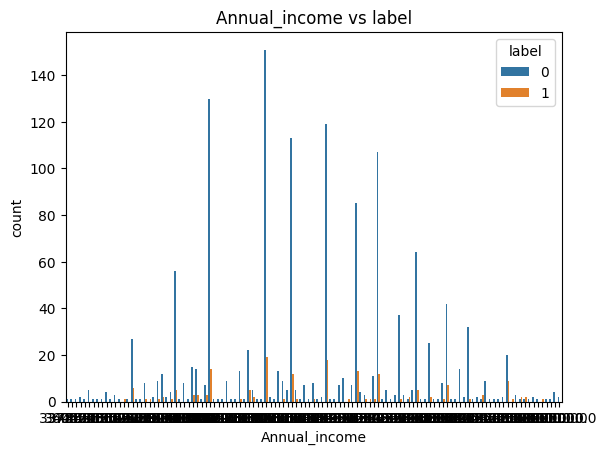

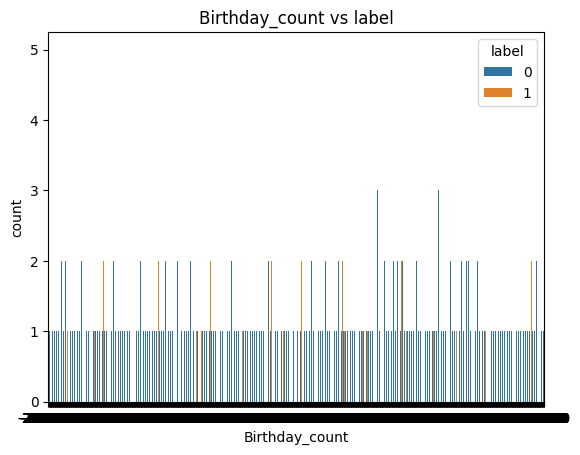

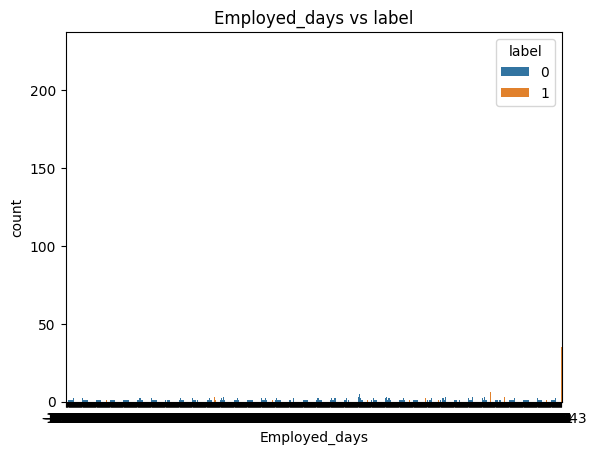

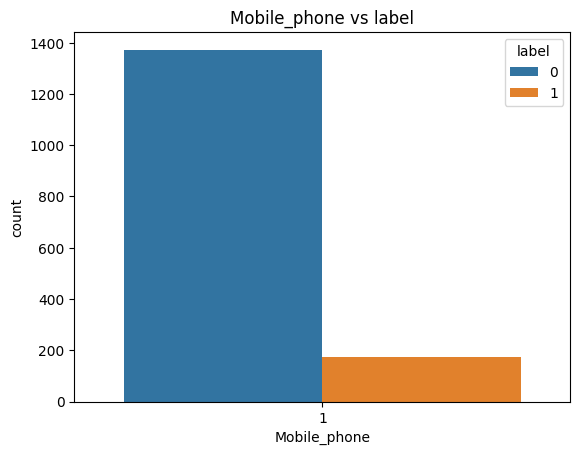

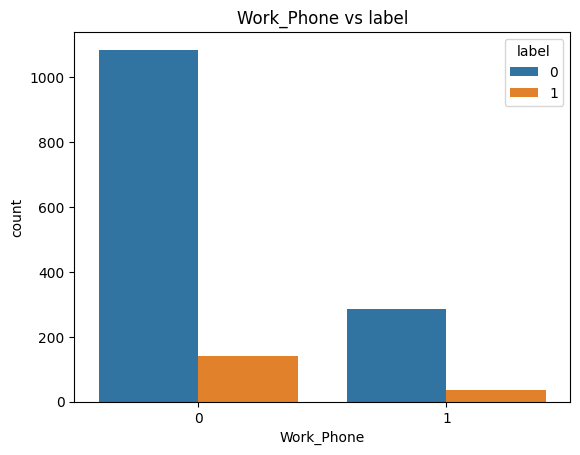

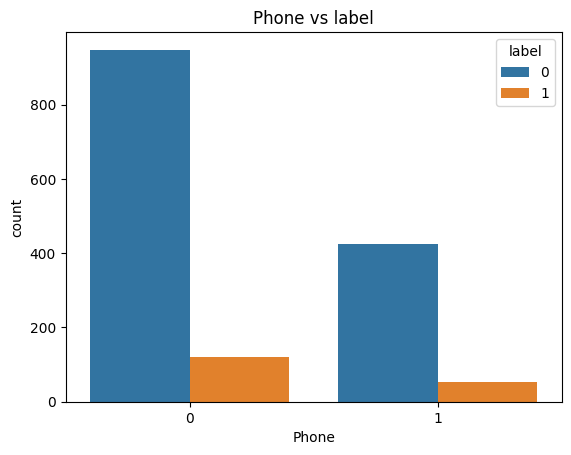

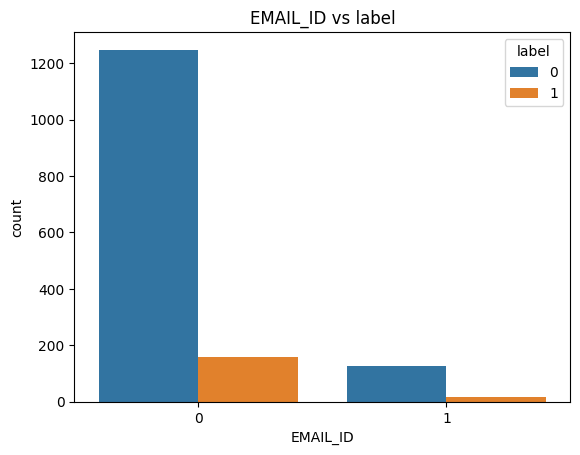

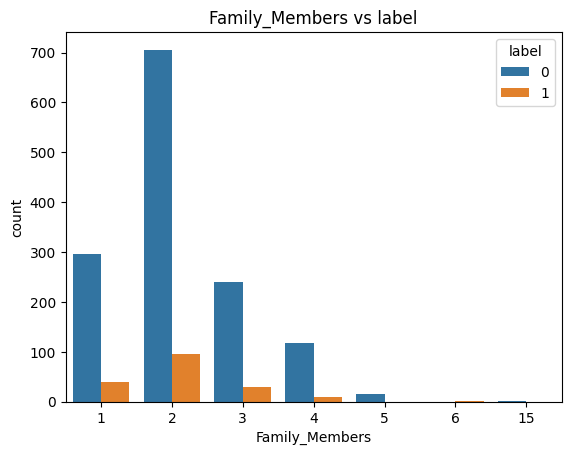

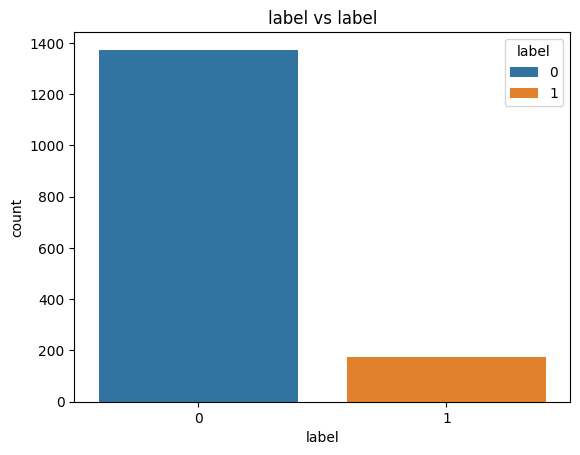

In [ ]:
# Plot relationships between numerical features and the target variable
for feature in numerical_features:
    sns.countplot(data=credit_df, hue=credit_df['label'], x=credit_df[feature])
    plt.title(f'{feature} vs label')
    plt.show()

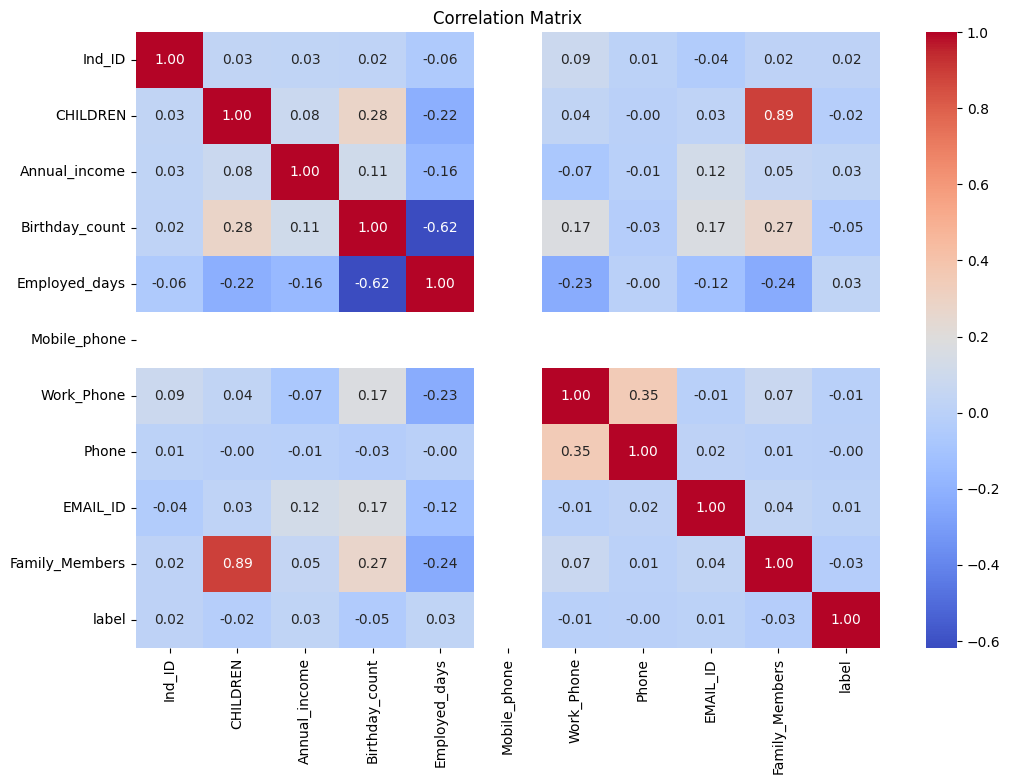

In [ ]:
# Compute and visualize the correlation matrix
correlation_matrix = credit_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
corr_with_target = correlation_matrix['label'].sort_values(ascending=False)
print(corr_with_target)

label             1.000000
Employed_days     0.031408
Annual_income     0.027456
Ind_ID            0.016796
EMAIL_ID          0.012921
Phone            -0.000664
Work_Phone       -0.007046
CHILDREN         -0.021646
Family_Members   -0.030709
Birthday_count   -0.045097
Mobile_phone           NaN
Name: label, dtype: float64


**Summary of the correlation matrix**

- **High Correlation:** The number of children (`CHILDREN`) is strongly correlated with the total number of family members (`Family_Members`) at 0.89. This suggests these features are closely related, which is expected.

- **Moderate Negative Correlation:** There is a notable negative correlation between `Birthday_count` (age) and `Employed_days` (employment duration) at -0.62, indicating that older individuals tend to have shorter recent employment periods.

- **Weak Correlation with Outcome:** The traget `label`, representing credit card approval or rejection, shows very weak correlations with all other features. This suggests that no single feature strongly predicts the outcome, emphasizing the need for a combination of features or a more complex model to improve prediction accuracy.

## Data Quality Issues Identified

1. **Column Renaming**:Rename columns to enhance clarity and readability.

2. **Handling Missing Values**:
   - Choose appropriate strategies:
     - **Imputation**: Replace missing values with mean, median, or mode.
     - **Removal**: Drop rows or columns with excessive missing data.

3. **Outlier Management**:
   - Detect outliers using statistical methods (Z-score, IQR) or visual methods (box plots).
   - Decide on a handling approach:
     - **Removal**: Exclude outliers from the dataset.
     - **Transformation**: Apply techniques such as log transformation to mitigate their effect.

4. **Formatting**:
    - Correct inaccurate and inconsistent format in texts (e.g., ).
    - Standardize texts (e.g. Y to yes).
    - Convert texts to lowercase (e.g., No to no).

4. **Feature Transformation**:
   - Convert `Birthday_count` to `Age` for easier analysis.
   - Create a new `Employment_Status` feature based on `Employed_days` (e.g., categorize into employed, unemployed, or part-time).

5. **Binning Categorical Features**:
   - For features with numerous categories, group them into broader bins to simplify analysis and reduce dimensionality.

6. **Feature Extraction**:
   - Experiment with techniques like PCA or other dimensionality reduction methods since existing features show weak correlation with the label.
   - Create new features based on combinations or interactions of existing features.

7. **Dropping Columns**: Remove `Ind_ID` since it is a unique identifier.   





# Data Cleaning

Data Cleaning involves identifying and correcting errors or inconsistencies in the dataset, such as handling missing values, correcting data entry errors, and removing irrelevant or duplicate data. This step ensures that the data is accurate, complete, and ready for analysis or model development.

In [ ]:
# Renaming the columns
credit_df = credit_df.rename(columns={
    'Ind_ID': 'id',
    'GENDER': 'gender',
    'Car_Owner': 'car_owner',
    'Propert_Owner': 'property_owner',
    'CHILDREN': 'children',
    'Annual_income': 'annual_income',
    'Type_Income': 'income_type',
    'EDUCATION': 'education',
    'Marital_status': 'marital_status',
    'Housing_type': 'housing_type',
    'Birthday_count': 'birthday_count',
    'Employed_days': 'employed_days',
    'Mobile_phone': 'mobile_phone',
    'Work_Phone': 'work_phone',
    'Phone': 'phone',
    'EMAIL_ID': 'email_id',
    'Type_Occupation': 'occupation',
    'Family_Members': 'family_members'
})

In [ ]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.00,5150412.0
children,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.00,14.0
annual_income,1525.0,1.913993e+05,113252.997656,33750.0,121500.00,166500.0,225000.00,1575000.0
birthday_count,1526.0,-1.604034e+04,4229.503202,-24946.0,-19553.00,-15661.5,-12417.00,-7705.0
employed_days,1548.0,5.936469e+04,137808.062701,-14887.0,-3174.50,-1565.0,-431.75,365243.0
mobile_phone,1548.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
work_phone,1548.0,2.080103e-01,0.406015,0.0,0.00,0.0,0.00,1.0
phone,1548.0,3.094315e-01,0.462409,0.0,0.00,0.0,1.00,1.0
email_id,1548.0,9.237726e-02,0.289651,0.0,0.00,0.0,0.00,1.0
family_members,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.00,15.0


In [ ]:
credit_df.describe(include='object').T

,count,unique,top,freq
gender,1541,2,F,973
car_owner,1548,2,N,924
property_owner,1548,2,Y,1010
income_type,1548,4,Working,798
education,1548,5,Secondary / secondary special,1031
marital_status,1548,5,Married,1049
housing_type,1548,6,House / apartment,1380
occupation,1060,18,Laborers,268


## Separating the test

Before I proceed with analysis, I will separate the test set which I will use to evaluate the model's performance at the end. This approach prevents "data leakage," where information from the test set influences the model during training.

In [ ]:
# First split: Divide data into training + validation and test sets
train_set, test_set = train_test_split(credit_df,
                               test_size=0.2,
                               random_state=42,
                               stratify=credit_df['label'])

Using **`credit_df`** for initial data cleaning allows me to experiment and refine my approach without affecting the main **`train_set`**. Once I finalize the cleaning steps on **`credit_df`**, I will create a pipeline to apply those same steps to **`train_set`**.

In [ ]:
credit_df = train_set.copy()

In [ ]:
credit_df.columns

Index(['id', 'gender', 'car_owner', 'property_owner', 'children',
       'annual_income', 'income_type', 'education', 'marital_status',
       'housing_type', 'birthday_count', 'employed_days', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'occupation', 'family_members',
       'label'],
      dtype='object')

## Removing Duplicates

In [ ]:
duplicates = credit_df[credit_df.duplicated()]
duplicates

,id,gender,car_owner,property_owner,children,annual_income,income_type,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,occupation,family_members,label


There are no duplicated instances

## Handling missing values

Handling missing values is a critical part of data cleaning, where strategies such as removing rows, imputing values, or using model-based approaches are applied to address incomplete data. Properly dealing with missing values ensures that the dataset remains consistent and reliable for analysis and model building.

**Steps Involved**
1. **Check for Missing Values:**
   - I start by identifying which features in the dataset have missing values.

2. **Investigate Missing Values:**
   - For features where more than 50% of the values are missing, I drop those rows or columns, as the case may be to preserve the integrity of the data, as imputation might introduce bias or inaccuracies.
   - For features with missing values less than 50%, I delve into the data to determine the best imputation strategy. If imputation is not feasible or could significantly affect the data, I consider removing those rows or columns as the case may be.



In [ ]:
missing_values = credit_df.isnull().sum()
print(missing_values[missing_values > 0])

gender              6
annual_income      18
birthday_count     21
occupation        395
dtype: int64


In [ ]:
# Calculating the proportion of the missing values in each column
props_of_missing_values = (missing_values / len(credit_df) * 100).round(1)
print(props_of_missing_values[props_of_missing_values > 0])

gender             0.5
annual_income      1.5
birthday_count     1.7
occupation        31.9
dtype: float64


In [ ]:
# Drop Columns with More Than 50% Missing Values
cols_to_drop = missing_values[props_of_missing_values > 50].index
print("Columns with more than 50% missing values:", cols_to_drop)

Columns with more than 50% missing values: Index([], dtype='object')


Since no columns meet this requirement, none of is dropped. I would now consider the next step.

### Gender
Since the missing gender values account for less than 1 percent of the column, I will remove the rows with missing gender information, as imputation may negatively affect the accuracy of the data.

In [ ]:
# Dropping the missing gender rows
credit_df = credit_df.dropna(subset=['gender'])

print(credit_df['gender'].isnull().sum())  # Verify that there are no missing values left

0


### Annual Income

**Imputation Strategy**

Since the `annual_income` feature is positively skewed, I will handle the missing values by calculating the median annual income for each occupation category. This approach leverages occupation-specific data, making the imputation more contextually relevant and preserving the integrity of the distribution. Using the median, rather than the mean, is appropriate due to the skewness of the data, as it is more robust to outliers and skewed distributions.

For rows where the occupation is missing, I will drop those rows entirely, as there is no occupation-specific median available for imputation. This ensures that the imputation is only applied to rows where meaningful data is present.

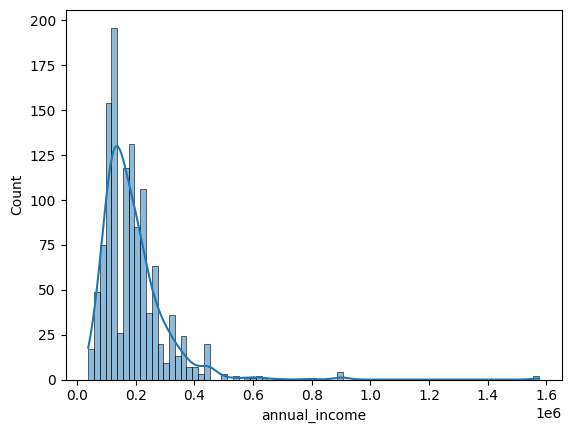

In [ ]:
sns.histplot(x=credit_df['annual_income'], kde=True)
plt.show()

In [ ]:
# Calculate the median annual income for each occupation category
median_income_by_occupation = credit_df.groupby('occupation')['annual_income'].median()

# Define a function to impute missing values based on occupation
def impute_income(row):
    if pd.isna(row['annual_income']):
        return median_income_by_occupation.get(row['occupation'], np.nan)
    else:
        return row['annual_income']

# Apply the function to impute missing values in 'annual_income'
credit_df['annual_income'] = credit_df.apply(impute_income, axis=1)

# Remove rows with null annual income since occupation is null as well
credit_df = credit_df.dropna(subset=['annual_income'])

print(credit_df['annual_income'].isnull().sum())  # Verify that there are no missing values left

0


### Birthday Count

In simple terms, **`Birthday_count`** represents how many days have passed since the applicant’s last birthday. Here’s how to interpret it:

- **0:** The applicant's birthday is today.
- **-1:** The applicant's birthday was yesterday.
- **Positive Numbers:** The number of days since the applicant’s last birthday (e.g., a value of 10 means it has been 10 days since the applicant’s last birthday).
- **Negative Numbers:** The number of days until the applicant's next birthday (e.g., a value of -5 means the applicant's next birthday is in 5 days).

This measure helps track the time elapsed or remaining until the applicant's next birthday relative to the current date.

**Imputation Strategy**

Since the missing birthday_count values account for less than 2 percent of the column, I will remove the rows with missing information, as imputation may negatively affect the accuracy of the data.

In [ ]:
# Remove rows with missing birthday_count

credit_df = credit_df.dropna(subset=['birthday_count'])

print(credit_df['birthday_count'].isnull().sum())  # Verify that there are no missing values left

0


### Occupation

**Imputation Strategy**

To handle missing values in the **`occupation`** feature, I have decided to drop rows where the occupation is missing. Imputing these values could introduce bias or inaccuracies, as there is no reliable method to infer the missing occupations without potentially distorting the data. By removing these rows, I maintain the integrity of the dataset and ensure that subsequent analyses and models are based on complete and accurate information.


In [ ]:
#Remove rows with null occupation
credit_df = credit_df.dropna(subset=['occupation'])

print(credit_df['occupation'].isnull().sum())  # Verify that there are no missing values left

0


## Correcting Errors, Inconsistencies and Formats


I will examine the categorical columns to identify and correct any typographical errors or inconsistencies. Additionally, I will standardize values by ensuring consistent formatting, such as changing `Y` to `Yes` and `N` to `No`. Also converting texts to lowercases.
I will also consolidate similar values to simplify categories, which will improve the clarity and uniformity of the dataset.


In [ ]:
categorical_features = credit_df.select_dtypes(include=['object']).columns

In [ ]:
for column in categorical_features:
    print(f"There are {credit_df[column].nunique()} unqiue values in {column}:")
    print(f"\n{credit_df[column].unique()}\n")

There are 2 unqiue values in gender:

['M' 'F']

There are 2 unqiue values in car_owner:

['N' 'Y']

There are 2 unqiue values in property_owner:

['N' 'Y']

There are 4 unqiue values in income_type:

['Working' 'Commercial associate' 'State servant' 'Pensioner']

There are 4 unqiue values in education:

['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary']

There are 5 unqiue values in marital_status:

['Married' 'Single / not married' 'Separated' 'Widow' 'Civil marriage']

There are 6 unqiue values in housing_type:

['House / apartment' 'Municipal apartment' 'With parents'
 'Rented apartment' 'Office apartment' 'Co-op apartment']

There are 18 unqiue values in occupation:

['Drivers' 'Core staff' 'Laborers' 'IT staff' 'Sales staff' 'Managers'
 'Medicine staff' 'High skill tech staff' 'Private service staff'
 'Low-skill Laborers' 'Accountants' 'Security staff' 'Secretaries'
 'Cooking staff' 'Cleaning staff' 'HR staff' 'Realty agents'
 'Waiters/bar

In [ ]:
# Converting values to lowercases, standardizing values

# gender
credit_df['gender'] = credit_df['gender'].replace({'M': 'male', 'F': 'female'})

# car_ownner
credit_df['car_owner'] = credit_df['car_owner'].replace({'Y': 'yes', 'N': 'no'})

# property_owner
credit_df['property_owner'] = credit_df['property_owner'].replace({'Y': 'yes', 'N': 'no'})

In [ ]:
# Converting values to lowercases, consolidating similar categories

# income type
credit_df['income_type'] = credit_df['income_type'].replace({
    'Pensioner': 'pensioner',
    'Commercial associate': 'employee',
    'Working': 'employee',
    'State servant': 'state employee'
})

# education
credit_df['education'] = credit_df['education'].replace({
    'Higher education': 'higher education',
    'Secondary / secondary special': 'secondary education',
    'Lower secondary': 'secondary education',
    'Incomplete higher': 'higher education',
})

#marital status
credit_df['marital_status'] = credit_df['marital_status'].replace({
    'Married': 'married',
    'Single / not married': 'single',
    'Civil marriage': 'married',
    'Separated': 'single',
    'Widow': 'single'
})

# housing type
credit_df['housing_type'] = credit_df['housing_type'].replace({
    'House / apartment': 'house',
    'With parents': 'house',
    'Rented apartment': 'apartment',
    'Municipal apartment': 'apartment',
    'Co-op apartment': 'apartment',
    'Office apartment': 'office apartment'
})

# occupation type
credit_df['occupation'] = credit_df['occupation'].replace({
    'Core staff': 'administrative staff',
    'Cooking staff': 'service staff',
    'Laborers': 'laborers',
    'Sales staff': 'sales staff',
    'Accountants': 'administrative staff',
    'High skill tech staff': 'tech staff',
    'Managers': 'administrative staff',
    'Cleaning staff': 'service staff',
    'Drivers': 'service staff',
    'Low-skill Laborers': 'laborers',
    'IT staff': 'tech staff',
    'Waiters/barmen staff': 'service staff',
    'Security staff': 'specialized staff',
    'Medicine staff': 'medical staff',
    'Private service staff': 'service staff',
    'HR staff': 'administrative staff',
    'Secretaries': 'administrative staff',
    'Realty agents': 'specialized staff'
})

In [ ]:
for column in categorical_features:
    print(f"There are now {credit_df[column].nunique()} unqiue values in {column}:")
    print(f'These are the unique values in the {column} column:\n{credit_df[column].unique()}\n')

There are now 2 unqiue values in gender:
These are the unique values in the gender column:
['male' 'female']

There are now 2 unqiue values in car_owner:
These are the unique values in the car_owner column:
['no' 'yes']

There are now 2 unqiue values in property_owner:
These are the unique values in the property_owner column:
['no' 'yes']

There are now 3 unqiue values in income_type:
These are the unique values in the income_type column:
['employee' 'state employee' 'pensioner']

There are now 2 unqiue values in education:
These are the unique values in the education column:
['secondary education' 'higher education']

There are now 2 unqiue values in marital_status:
These are the unique values in the marital_status column:
['married' 'single']

There are now 3 unqiue values in housing_type:
These are the unique values in the housing_type column:
['house' 'apartment' 'office apartment']

There are now 7 unqiue values in occupation:
These are the unique values in the occupation column:


## Handling Outliers

In [ ]:
numerical_features = credit_df.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
# Identifying the outliers

# Dictionary to store outlier counts for each feature
outlier_counts = {}

for feature in numerical_features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = credit_df[feature].quantile(0.25)
    Q3 = credit_df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    outliers = (credit_df[feature] < (Q1 - 1.5 * IQR)) | (credit_df[feature] > (Q3 + 1.5 * IQR))

    # Count outliers
    outlier_counts[feature] = outliers.sum()

# Make a table of the outliers
outlier_table = pd.DataFrame(outlier_counts, index=['Count']).T
outlier_table.sort_values(by='Count', ascending=False)

,Count
work_phone,202
email_id,91
label,89
employed_days,47
annual_income,42
children,13
family_members,13
id,0
birthday_count,0
mobile_phone,0


In [ ]:
outliers_val = credit_df[(credit_df['children'] == 14) |
                              (credit_df['family_members'] > 5)]

outliers_val

,id,gender,car_owner,property_owner,children,annual_income,income_type,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,occupation,family_members,label
565,5061207,male,yes,yes,14,225000.0,employee,secondary education,single,house,-17754.0,-1689,1,0,0,0,service staff,15,0
121,5116258,female,no,yes,4,180000.0,employee,secondary education,married,house,-17468.0,-7413,1,0,0,0,administrative staff,6,1


**Strategy**

In analyzing outliers, I have decided to focus specifically on the extreme values in the `children` and `family_members` features. I filtered the dataset above to capture rows where the number of children is exactly 14 or the number of family members exceeds 5. After investigating, I will remove only the rows where the number of children is 14, as I am unsure of the accuracy of this value.

For other identified outliers in the dataset, which are considered integral to the data structure, I will leave them as they are. This approach balances the need for accuracy with the preservation of the dataset's integrity.


In [ ]:
# Identify the rows where 'children' is 14
rows_to_drop = credit_df[credit_df['children'] == 14].index

# Drop the identified rows
credit_df = credit_df.drop(rows_to_drop)

# Verify that the rows have been removed
credit_df[credit_df['children'] == 14]

,id,gender,car_owner,property_owner,children,annual_income,income_type,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,occupation,family_members,label


## Feature Engineering

Feature engineering is the process of transforming raw data into meaningful features that enhance the performance of machine learning models. This involves creating new variables, modifying existing ones, or combining features to better represent the underlying patterns in the data and improve predictive accuracy.

### Generating Age from Birthday_count

**`Birthday_count`** represents how many days have passed since the applicant’s last birthday.

I will simplify the **`Birthday_count`** feature into a more intuitive **`age`** feature that is easier to interpret and use for analysis.

**Calculate Age from Birthday Count**

To convert the **`Birthday_count`** into **`age`**, I will use the following approach:

- **Positive `Birthday_count`:** Indicates the number of days since the last birthday. To calculate age, I will convert days into years.
- **0 `Birthday_count`:** Indicates the applicant's birthday is today, so their age is already known.
- **Negative `Birthday_count`:** Indicates the number of days until the next birthday, which means the person is a year younger until their next birthday occurs.

### **Steps to Convert to Age**

1. **Convert Days to Years:**
   - **Age Calculation:** Divide the `Birthday_count` by 365 (or 365.25 to account for leap years) to get the approximate number of years.

2. **Handle Special Cases:**
   - If `Birthday_count` is 0, then the age is known (current age).
   - If `Birthday_count` is negative, adjust the age by subtracting one year from the age computed.



In [ ]:
# Define a function to calculate age from Birthday_count
def calculate_age(birthday_count):
    if birthday_count >= 0:
        return birthday_count // 365  # Age in years
    else:
        return (-birthday_count // 365) - 1  # Age in years, adjusted for upcoming birthday

# Apply the function to create a new 'age' column
credit_df['age'] = credit_df['birthday_count'].apply(calculate_age)

# Convert the 'age' column to integer to remove decimals
credit_df['age'] = credit_df['age'].astype(int)

credit_df[['birthday_count', 'age']].head()

,birthday_count,age
310,-17154.0,45
1484,-12175.0,32
1210,-10344.0,27
829,-14084.0,37
53,-9594.0,25


In [ ]:
credit_df['age'].describe()

,age
count,824.000000
mean,39.106796
std,9.574584
min,20.000000
25%,31.000000
50%,38.000000
75%,47.000000
max,64.000000


### Bining Age categories to Age Groups


To simplify the interpretation of the `age` feature, I decided to create categorical age groups based on the summary statistics of the `age` column. The summary statistics provided insight into the distribution of the data, showing key percentiles (25th, 50th, and 75th), which I used to define appropriate bins.

The bins were created as follows:
- Ages between 20 and 29 fall into the first group, based on the minimum and 25th percentile.
- Ages between 30 and 38 fall into the second group, covering the range from the 25th to just before the 50th percentile (median).
- Ages between 39 and 46 fall into the third group, covering from the median to the 75th percentile.
- Ages between 47 and 64 fall into the final group, from the 75th percentile up to the maximum value in the dataset.

This binning strategy provides clear, intuitive age categories based on the natural distribution of the data.

In [ ]:
# Create 'age_group' column based on the summary statistics

# Defining the bin edges
age_bins = [20, 30, 39, 47, 65]

# Labels for each range
age_labels = ['20-29', '30-38', '39-46', '47-64']

# Applying the bins
credit_df['age_group'] = pd.cut(credit_df['age'], bins=age_bins, labels=age_labels, right=False)

In [ ]:
credit_df[['age', 'age_group']].sample(10)

,age,age_group
860,34,30-38
1080,36,30-38
177,34,30-38
1492,43,39-46
654,27,20-29
203,26,20-29
674,56,47-64
1488,37,30-38
276,31,30-38
653,54,47-64


In [ ]:
# Verify the 'age_group' column
credit_df['age_group'].value_counts()

,count
age_group,
30-38,256
47-64,208
39-46,202
20-29,158


### Generating Employment status from employed days

**Employed_days**: This feature represents the number of days an applicant has been employed. Positive values indicate that the applicant is currently unemployed.

To make the `employed_days` feature more intuitive and easier to interpret, I will create a new feature called `employment_status`. Since positive values in the `employed_days` column indicate unemployment, I will classify applicants into two categories: **Employed** and **Unemployed**. Those with non-positive `employed_days` will be categorized as **Employed**, while positive values will indicate **Unemployed** status. Once this new feature is created, the `employed_days` column will no longer be needed and will be dropped.



In [ ]:
# Use a lambda function to create 'employment_status' based on 'employed_days'
credit_df['employment_status'] = credit_df['employed_days'].apply(lambda x: 'unemployed' if x > 0 else 'employed')

# Ensure the 'employment_status' column is explicitly cast as a string
credit_df['employment_status'] = credit_df['employment_status'].astype(str)

# Verify the new 'employment_status' column
credit_df['employment_status'].value_counts()

,count
employment_status,
employed,824


**The `employment_status` feature has only one unique values. This doesn't provide any useful information for modeling and can be dropped**

### Bining Annual income categories

In [ ]:
credit_df['annual_income'].describe()

,annual_income
count,8.240000e+02
mean,1.986205e+05
std,1.252840e+05
min,4.050000e+04
25%,1.350000e+05
50%,1.800000e+05
75%,2.250000e+05
max,1.575000e+06



**Creating Annual Income Categories**

I will create income categories that better represent the distribution of values based on the summary statistics for the `annual_income` feature to create more intuitive groups for the feature.
The ranges will be chosen to reflect a reasonable distribution, helping to segment the data for better insights into income patterns:

- **Low**: Up to the 25th percentile.
- **Middle**: Between the 25th and 50th percentiles.
- **Upper**: Between the 50th and 75th percentiles.
- **Very High**: Between the 75th percentile and above.
-

In [ ]:
# Define the bins for 5 income categories based on summary statistics
income_bins = [0, 120000, 170000, 225000, float('inf')]  # Defining the bin edges based on the data
income_labels = ['low income',
                 'middle income',
                 'high income',
                 'very high income']  # Labels for each range

# Create 'income_category' column using pd.cut
credit_df['income_category'] = pd.cut(credit_df['annual_income'],
                                           bins=income_bins,
                                           labels=income_labels,
                                           right=False)

# Ensure the 'income_category' column is explicitly cast as a string
credit_df['income_category'] = credit_df['income_category'].astype(str)

# Check the distribution of the new category
credit_df['income_category'].value_counts()

,count
income_category,
very high income,267
middle income,221
low income,176
high income,160


### Family Situation


In this step, I will explore the family-related features: **children**, **marital_status**, and **family_members**. The goal is to better understand their relationships and identify potential feature engineering opportunities. By analyzing these features together, I hope to capture meaningful interactions or patterns that could be useful for predicting outcomes.

In [ ]:
credit_df[['children', 'marital_status', 'family_members']].sample(20)

,children,marital_status,family_members
1125,0,married,2
948,1,married,3
178,0,married,2
247,0,married,2
175,1,married,3
825,0,married,2
140,0,single,1
988,0,single,1
657,2,married,4
298,2,married,4


**Family Situation Analysis**

Upon visual examination, I have identified potential relationships between the family-related features: **children**, **marital_status**, and **family_members**. For instance:

- When the **marital_status** is "married", the **family_members** count should generally be 2 plus the number of **children**.

- Conversely, if the **marital_status** is "single", the **family_members** count should be 1 plus the number of **children**.

I will create a new feature called `family_size` by combining the number of children with a value mapped from the marital status of each individual. The logic behind this is that for individuals who are married or in a civil partnership, their family size would typically include the spouse, resulting in an addition of 2 to the number of children. For individuals who are single or widowed, only 1 is added to the number of children.

Once the `family_size` feature is created, I will categorize it into different groups to simplify the dataset. Families will be grouped into three categories: '1-2', '3-4', and '5+'.

In [ ]:
# Create a dictionary to map marital status to the corresponding family size adjustment
marital_status_mapping = {
    'married': 2,
    'single': 1
}

# Create the 'family_size' column by adding children to the mapped value of marital status
credit_df['family_size'] = credit_df['children'] + credit_df['marital_status'].map(marital_status_mapping)

# Check the result
credit_df[['children', 'marital_status', 'family_size']].sample(10)

,children,marital_status,family_size
1326,0,married,2
655,0,single,1
1538,0,married,2
280,0,single,1
1296,0,married,2
718,0,single,1
564,0,single,1
214,2,married,4
967,0,married,2
1409,0,married,2


In [ ]:

credit_df['family_size'].unique()

array([2, 3, 1, 4, 5, 6])

In [ ]:
# Define the bins and labels for categorizing family size
family_size_bins = [0, 2, 4, float('inf')]  # Bins for '1-2', '3-4', and '5+'
family_size_labels = ['1-2', '3-4', '5+']

# Create the 'family_size' column
credit_df['family_size'] = pd.cut(credit_df['family_size'],
                                                bins=family_size_bins,
                                                labels=family_size_labels,
                                                right=True)

# Display the first few rows to check
credit_df[['family_size']].head()

,family_size
310,1-2
1484,1-2
1210,1-2
829,1-2
53,3-4


### Communication related features

In [ ]:
credit_df[['phone', 'work_phone', 'mobile_phone', 'email_id', 'employment_status']].sample(20)

,phone,work_phone,mobile_phone,email_id,employment_status
688,0,0,1,0,employed
1154,0,0,1,0,employed
779,0,0,1,0,employed
1435,0,0,1,0,employed
367,1,0,1,0,employed
1079,0,0,1,0,employed
839,1,0,1,0,employed
1502,1,1,1,0,employed
1432,1,1,1,0,employed
710,0,0,1,0,employed


Looking at the sampled data, there seems to be a pattern with the `phone`, `work_phone`, `mobile_phone`, and `email_id` columns. The rows indicate whether a client has any of these communication devices or phone number, with 1 indicating possession and 0 indicating absence.

**Potential Observations:**

* Some employed individuals have a mobile phone, but no work phone or phone number or email_id.

* A few individuals have both a phone number and work phone.
  
* Many have no work phone but may or may not have a phone number or mobile phone or email_id.

**Feature Engineering:**

I will create a new column called `communication_access` that combines information from the `phone`, `work_phone`, `mobile_phone`, and `email_id` columns. This column will categorize clients based on their overall access to communication devices. The categories will be:

- **Limited Access**: Clients who have less than one type of communication tool.
- **Full Access**: Clients who have more than one type of communication tool.

This approach will simplify the communication-related data and provide a more intuitive understanding of each client's communication capabilities.

In [ ]:
# Define a function to categorize communication access including email_id
def categorize_communication_access(row):
    # Check the presence of communication tools
    has_phone = row['phone'] == 1
    has_work_phone = row['work_phone'] == 1
    has_mobile_phone = row['mobile_phone'] == 1
    has_email = row['email_id'] == 1

    # Count the number of communication tools present
    communication_tools_count = sum([has_phone, has_work_phone, has_mobile_phone, has_email])

    # Categorize based on the count of communication tools
    if communication_tools_count <= 1:
        return 'limited access'
    else:
        return 'full access'

# Apply the function to create the 'communication_access' column
credit_df['communication_access'] = credit_df.apply(categorize_communication_access, axis=1)

# Check the unique values in the new 'communication_access' column
print(credit_df['communication_access'].value_counts())

communication_access
limited access    443
full access       381
Name: count, dtype: int64


In [ ]:
credit_df['communication_access'].unique()

array(['limited access', 'full access'], dtype=object)

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 310 to 224
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    824 non-null    int64   
 1   gender                824 non-null    object  
 2   car_owner             824 non-null    object  
 3   property_owner        824 non-null    object  
 4   children              824 non-null    int64   
 5   annual_income         824 non-null    float64 
 6   income_type           824 non-null    object  
 7   education             824 non-null    object  
 8   marital_status        824 non-null    object  
 9   housing_type          824 non-null    object  
 10  birthday_count        824 non-null    float64 
 11  employed_days         824 non-null    int64   
 12  mobile_phone          824 non-null    int64   
 13  work_phone            824 non-null    int64   
 14  phone                 824 non-null    int64   
 15  email_id 

## Removing columns not needed

In [ ]:

# List of columns to drop
columns_to_drop = ['id','birthday_count', 'age', 'employed_days', 'annual_income',
                    'family_members', 'children', 'mobile_phone', 'work_phone',
                    'phone', 'email_id', 'marital_status', 'employment_status']

# Drop the columns from the DataFrame
credit_df = credit_df.drop(columns=columns_to_drop)

# Exploratory Data Analysis of the Cleaned Dataset

In the context of this cleaned dataset, which is mostly composed of categorical variables, EDA helps us understand the distribution of each feature, identify potential correlations between variables, and detect any anomalies that might still exist. Techniques such as frequency counts, bar plots, and cross-tabulations are useful for examining categorical variables, allowing us to visualize how different features relate to each other and to the target variable. Through EDA, we gain valuable insights that guide our model-building decisions.

In [ ]:
credit_df.sample(10)

,gender,car_owner,property_owner,income_type,education,housing_type,occupation,label,age_group,income_category,family_size,communication_access
229,female,no,no,employee,secondary education,house,administrative staff,0,39-46,low income,1-2,full access
1521,male,no,yes,employee,higher education,house,laborers,0,30-38,very high income,1-2,limited access
548,male,yes,yes,employee,higher education,house,specialized staff,0,47-64,low income,1-2,limited access
1211,female,no,no,employee,higher education,house,administrative staff,0,30-38,very high income,1-2,full access
385,male,yes,no,employee,higher education,house,administrative staff,0,47-64,very high income,3-4,full access
351,male,yes,no,employee,secondary education,house,laborers,0,30-38,low income,3-4,full access
432,male,yes,yes,employee,higher education,house,administrative staff,0,30-38,very high income,1-2,limited access
825,male,no,yes,employee,secondary education,house,laborers,0,47-64,high income,1-2,limited access
758,male,no,no,employee,secondary education,house,service staff,0,47-64,high income,1-2,limited access
519,female,no,yes,state employee,secondary education,house,administrative staff,0,47-64,middle income,1-2,full access


In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 310 to 224
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                824 non-null    object  
 1   car_owner             824 non-null    object  
 2   property_owner        824 non-null    object  
 3   income_type           824 non-null    object  
 4   education             824 non-null    object  
 5   housing_type          824 non-null    object  
 6   occupation            824 non-null    object  
 7   label                 824 non-null    int64   
 8   age_group             824 non-null    category
 9   income_category       824 non-null    object  
 10  family_size           824 non-null    category
 11  communication_access  824 non-null    object  
dtypes: category(2), int64(1), object(9)
memory usage: 72.8+ KB



## Univariate Analysis
Univariate analysis examines the distribution and characteristics of a single variable to understand its range, central tendency, and spread.

In [ ]:
credit_df.describe(include=['object', 'category']).T

,count,unique,top,freq
gender,824,2,female,488
car_owner,824,2,no,465
property_owner,824,2,yes,525
income_type,824,3,employee,745
education,824,2,secondary education,561
housing_type,824,3,house,777
occupation,824,7,administrative staff,274
age_group,824,4,30-38,256
income_category,824,4,very high income,267
family_size,824,3,1-2,562


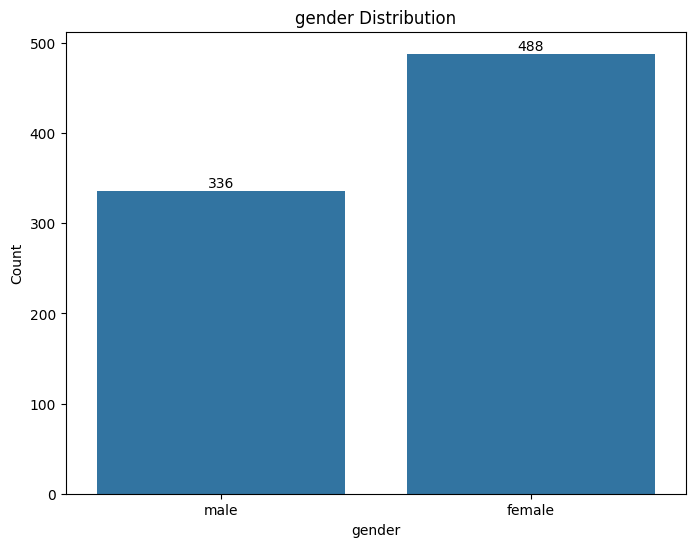

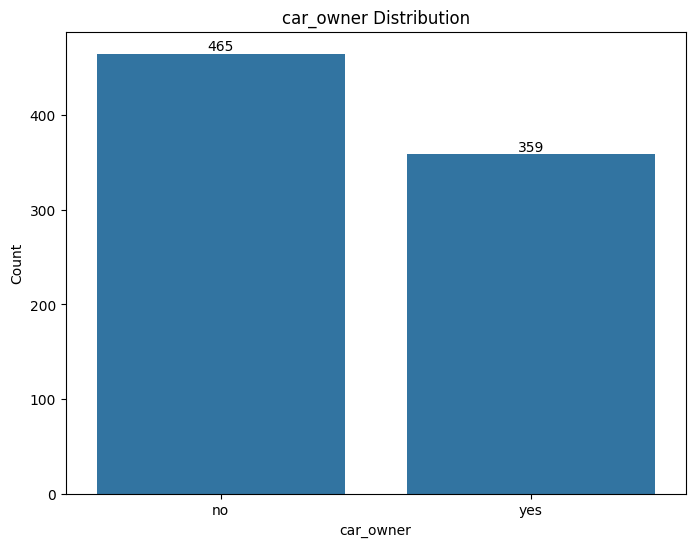

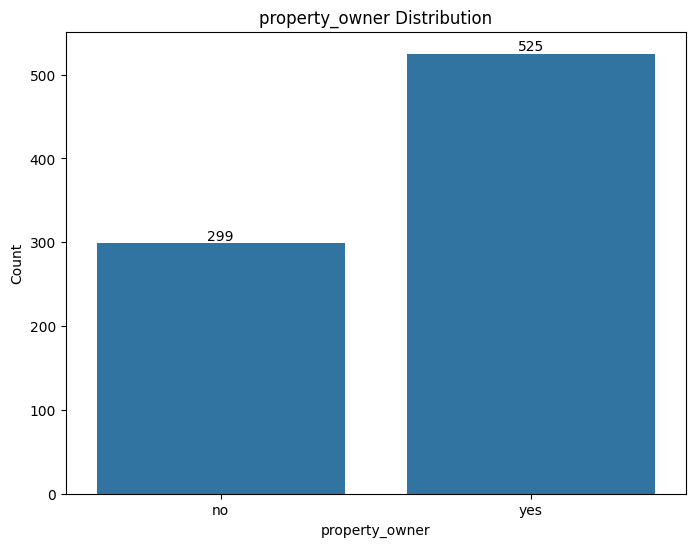

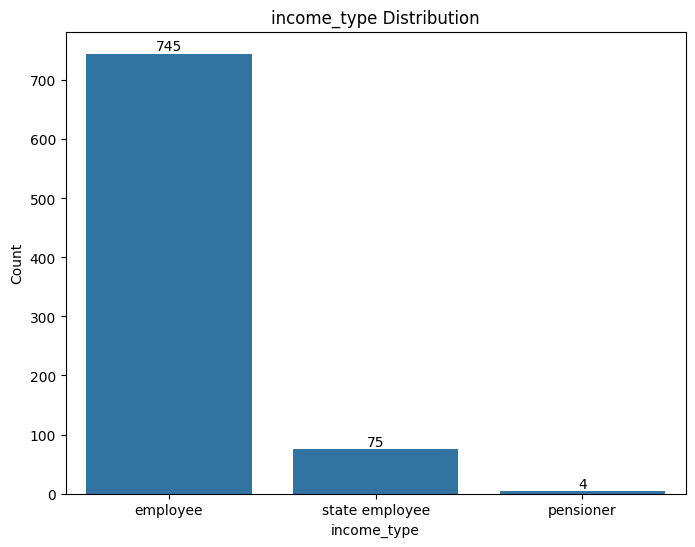

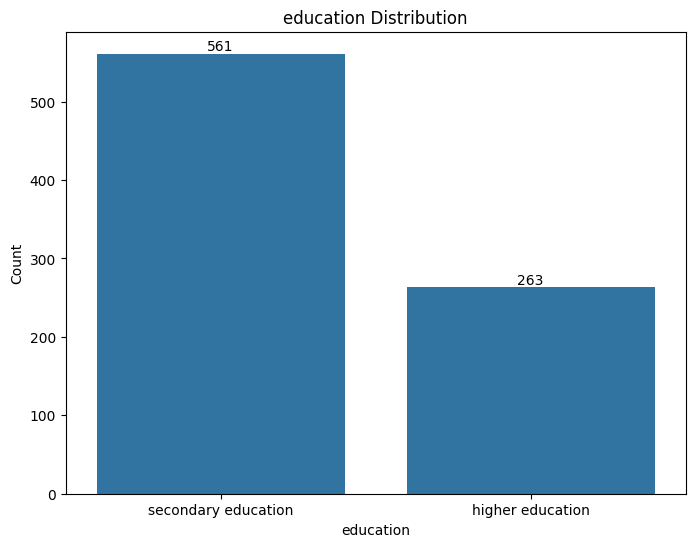

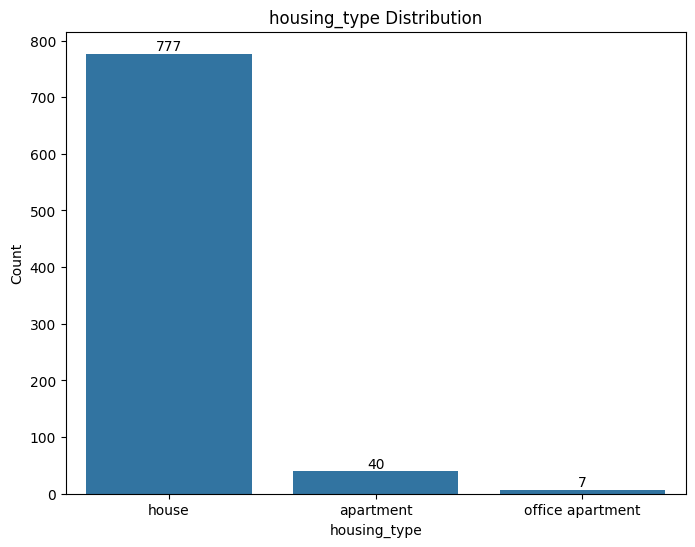

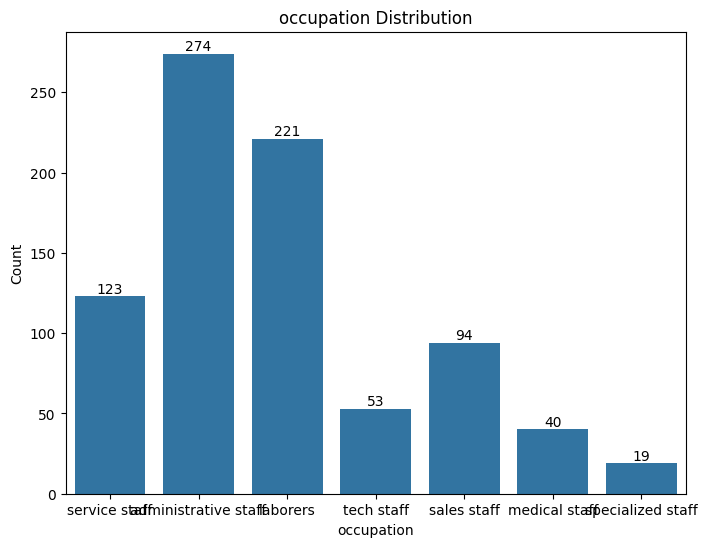

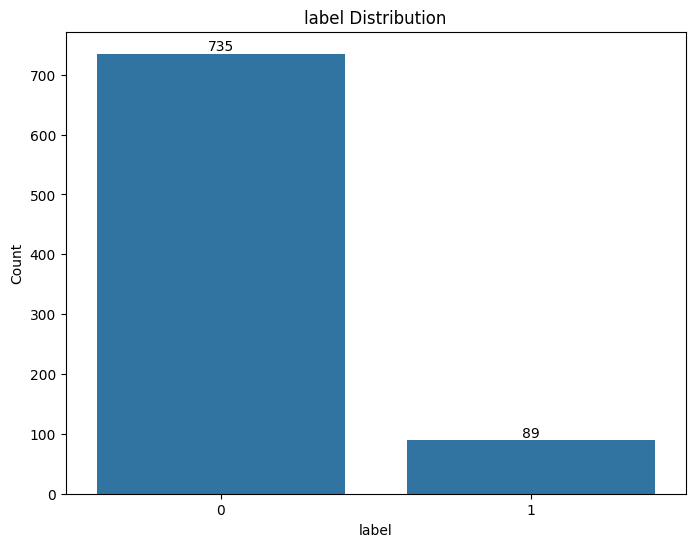

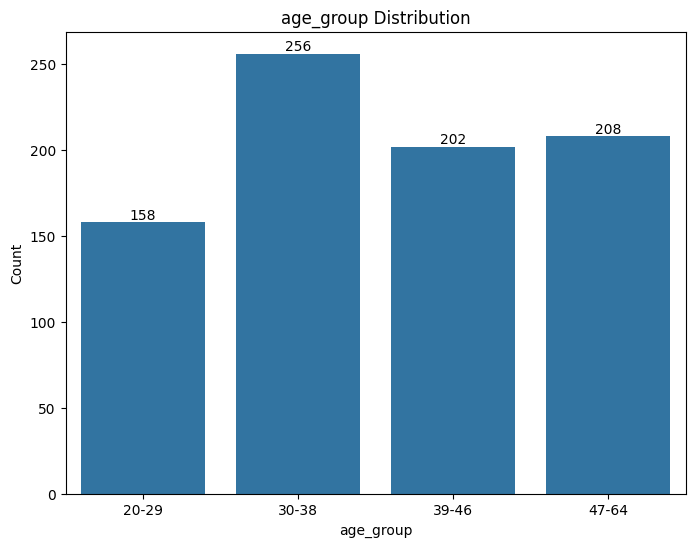

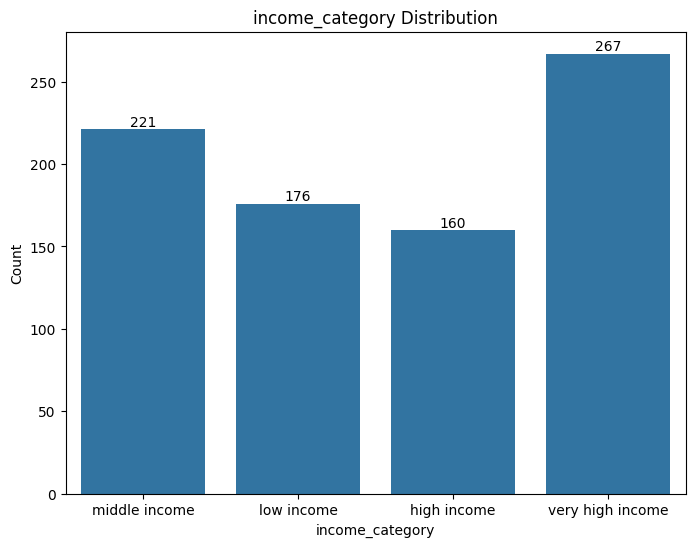

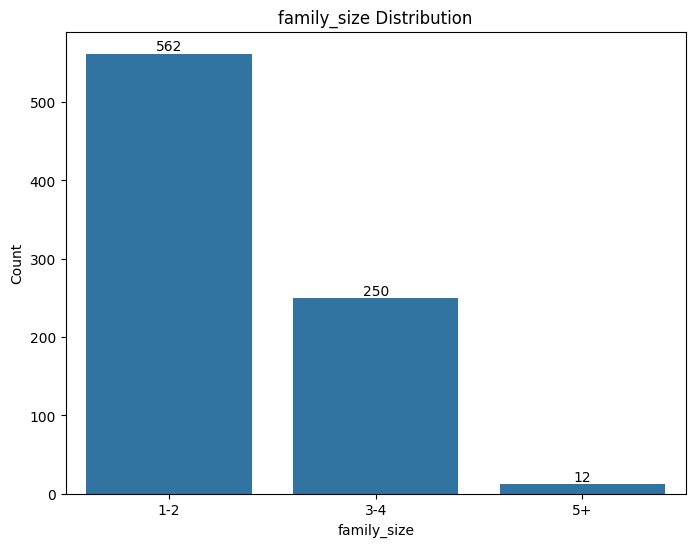

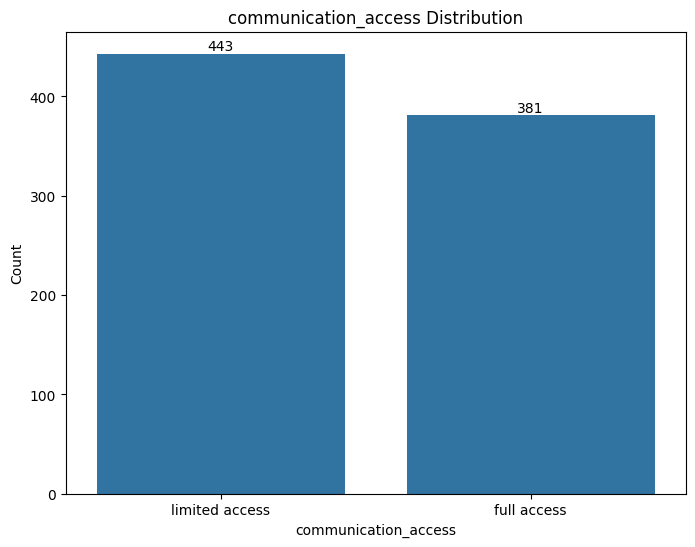

In [ ]:
for feature in credit_df:
    # Create the countplot
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=credit_df[feature])

    # Set the title and labels
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Loop through each bar in the plot
    for p in ax.patches:
        # Get the height of each bar and add text on top of the bar
        ax.text(p.get_x() + p.get_width() / 2.,  # x-position (center of bar)
                p.get_height(),  # y-position (height of bar)
                int(p.get_height()),  # Text (count value)
                ha='center',  # horizontal alignment
                va='bottom')  # vertical alignment (text on top of the bar)

    # Show the plot
    plt.show()

## Bivariate Analysis

Bivariate analysis explores the relationship between two variables, often using visualizations like scatter plots or cross-tabulations to identify correlations or associations.

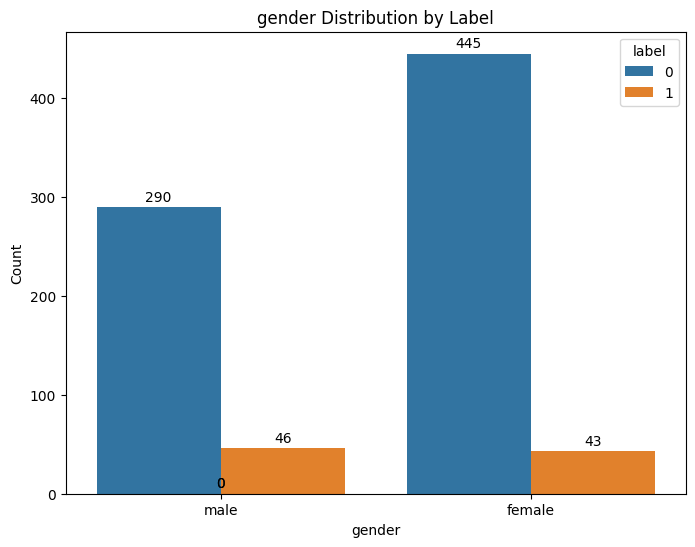

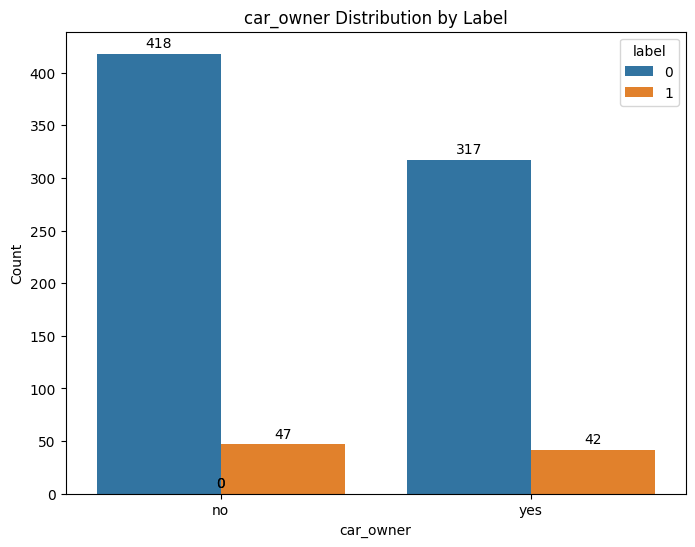

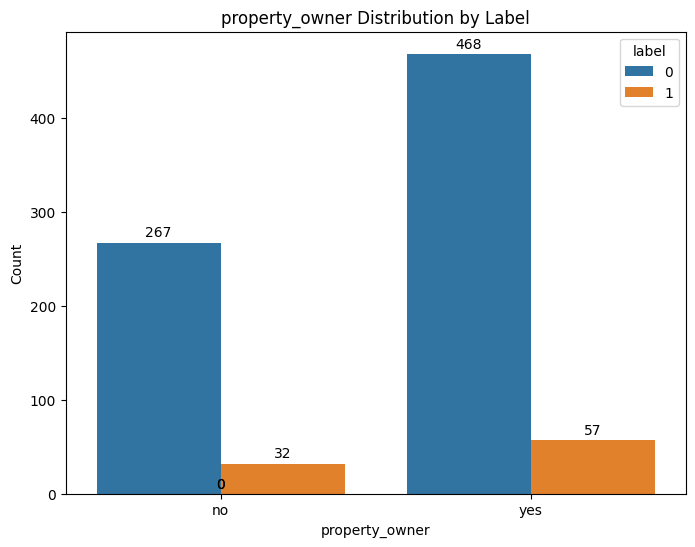

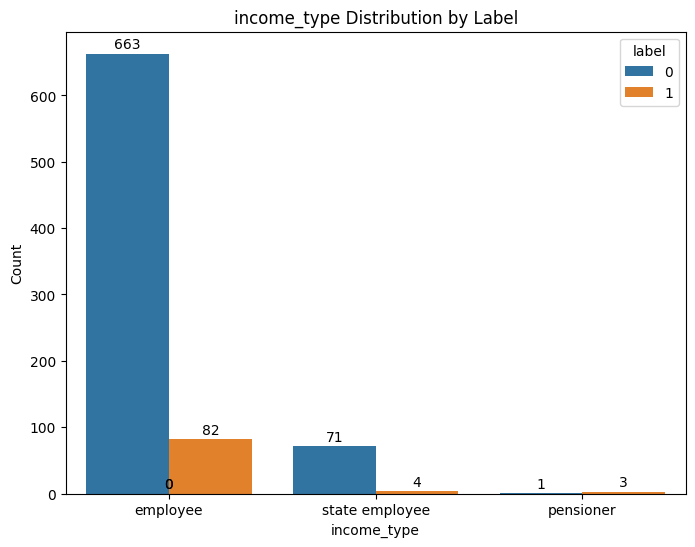

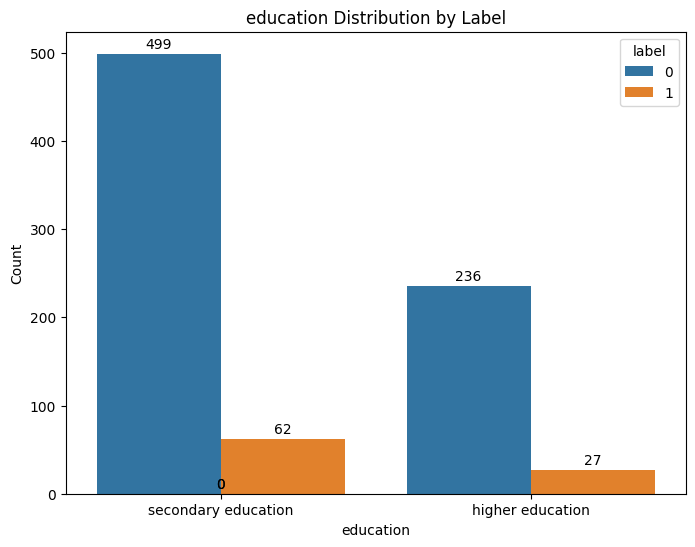

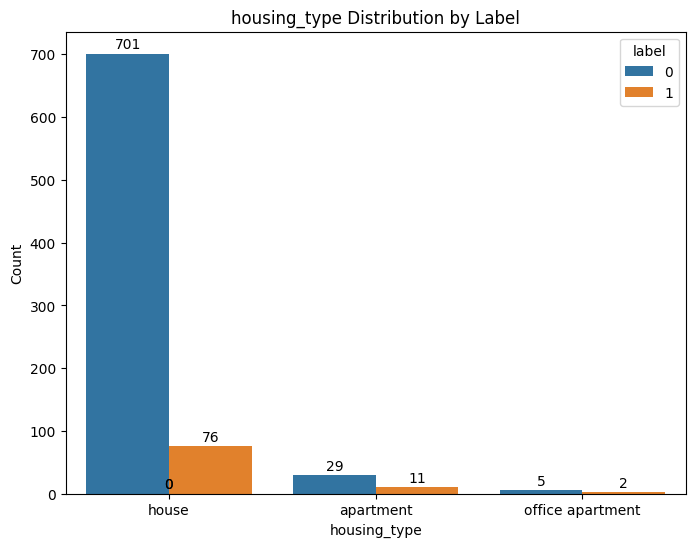

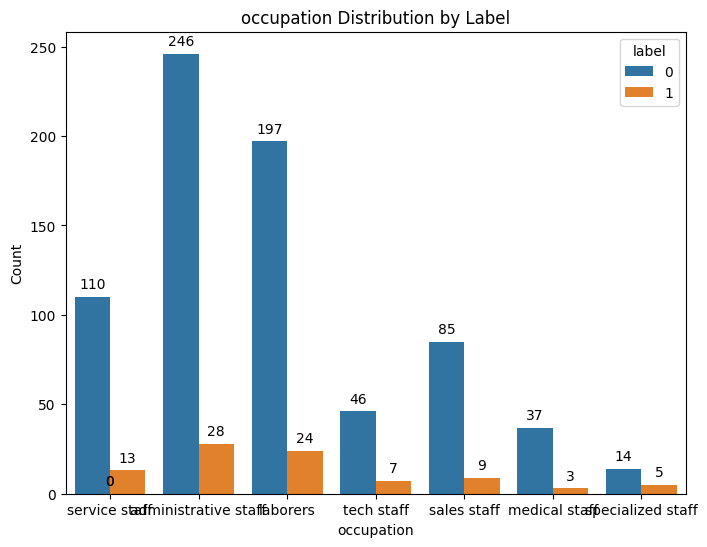

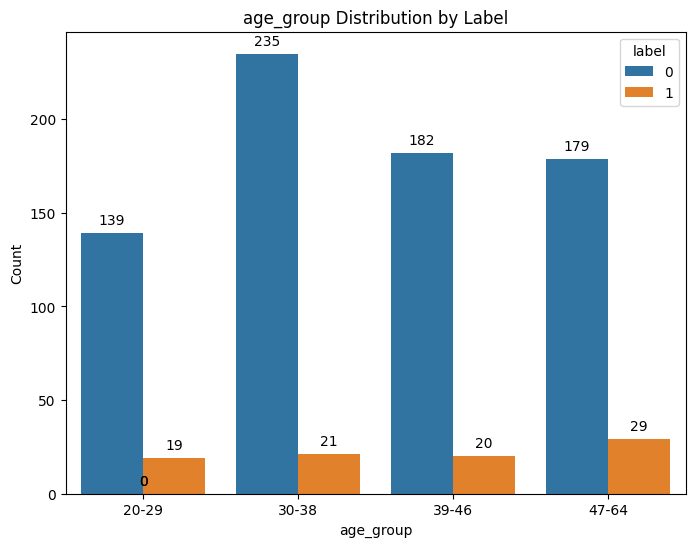

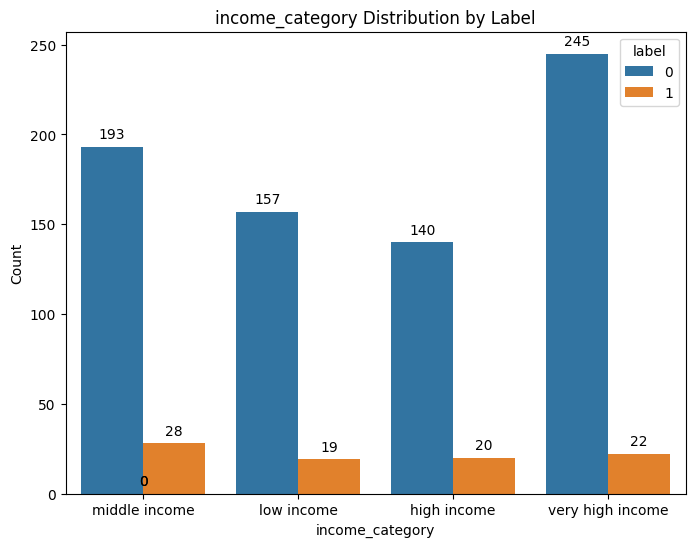

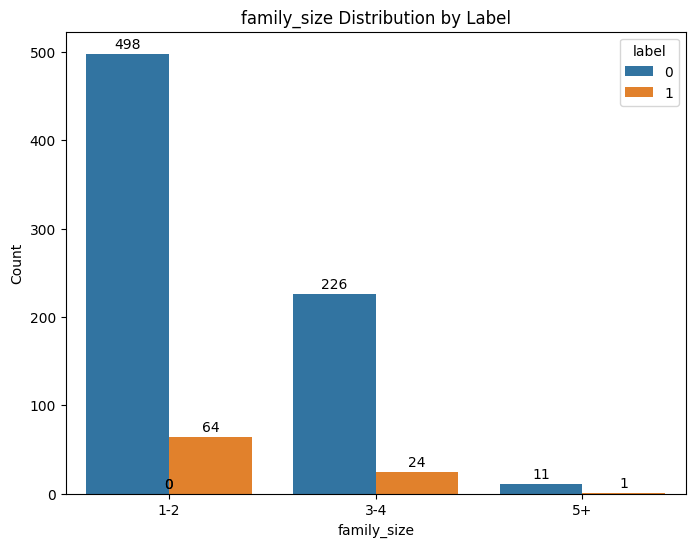

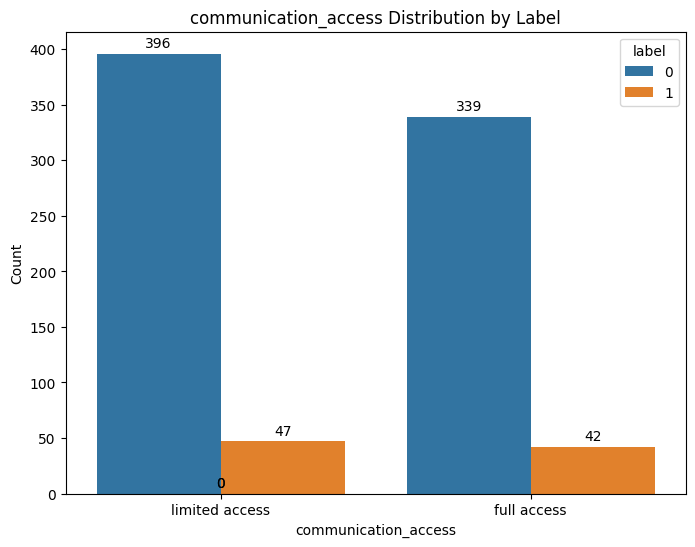

In [ ]:
for feature in credit_df:
    # Create the countplot
    # Filter the 'label' column
    if feature != 'label':
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(data=credit_df, x=feature, hue='label')

        # Set the title and labels
        plt.title(f'{feature} Distribution by Label')
        plt.xlabel(feature)
        plt.ylabel('Count')

        # Loop through each bar in the plot
        for p in ax.patches:
            # Get the height (count) of the bar
            height = p.get_height()

            # Add text above the bar
            ax.text(
                p.get_x() + p.get_width() / 2,  # Set the X-position (center of the bar)
                height + 3,      # Set the Y-position (above the bar)
                int(height),     # Convert the count to an integer for display
                ha='center',     # Horizontal alignment (centered on bar)
                va='bottom')     # Vertical alignment (slightly above the bar)

        # Show the plot
        plt.show()

# Data Preprocessing

Data preprocessing is the process of transforming raw data into a suitable format for analysis by applying techniques such as encoding categorical variables, scaling numerical features, and addressing any inconsistencies. This step prepares the dataset for machine learning models, improving their accuracy and performance.

**Steps involved**
- **Encoding Categorical Variables:** Convert categorical features into numerical formats using techniques such as one-hot encoding or label encoding.

- **Scaling Numerical Features**: Normalize or standardize numerical features to ensure they have a consistent scale, which helps improve model performance.

- **Feature Selection**: Optionally, reduce the number of features by selecting the most relevant ones or applying dimensionality reduction techniques if needed.



## Encoding categorical variables

1. Label Encoding: For features with no inherent order

2. One-Hot Encoding: for Features with Few Categories (3–4 unique values)

3. Ordinal Encoding: Best for categorical variables that have a specific order.

In [ ]:
for column in credit_df.columns:
    print(f"There are {credit_df[column].nunique()} unqiue values in {column}")

There are 2 unqiue values in gender
There are 2 unqiue values in car_owner
There are 2 unqiue values in property_owner
There are 3 unqiue values in income_type
There are 2 unqiue values in education
There are 3 unqiue values in housing_type
There are 7 unqiue values in occupation
There are 2 unqiue values in label
There are 4 unqiue values in age_group
There are 4 unqiue values in income_category
There are 3 unqiue values in family_size
There are 2 unqiue values in communication_access


In [ ]:
# Define the features for each encoding technique

# Features to be label encoded
label_enc_features = ['gender', 'car_owner',
                      'property_owner', 'housing_type', 'occupation']

# Features to be ordinal encoded
ordinal_features = ['age_group', 'income_category', 'family_size',
                'income_type', 'education', 'communication_access']

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder
for feature in label_enc_features:
    credit_df[feature] = label_encoder.fit_transform(credit_df[feature])

In [ ]:
# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Apply OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[
    ['20-29', '30-38', '39-46', '47-64'],
    ['low income', 'middle income', 'high income', 'very high income'],
    ['1-2', '3-4', '5+'],
    ['employee', 'state employee', 'pensioner'],
    ['secondary education', 'higher education'],
    ['limited access', 'full access']
])
credit_df[ordinal_features] = ordinal_encoder.fit_transform(credit_df[ordinal_features])

In [ ]:
# Display the first few rows of the updated DataFrame
credit_df.head()

,gender,car_owner,property_owner,income_type,education,housing_type,occupation,label,age_group,income_category,family_size,communication_access
310,1,0,0,0.0,0.0,1,4,0,2.0,1.0,0.0,0.0
1484,0,1,1,0.0,0.0,1,0,0,1.0,1.0,0.0,1.0
1210,0,0,0,0.0,0.0,1,1,0,0.0,0.0,0.0,0.0
829,1,1,0,0.0,0.0,0,4,0,1.0,2.0,0.0,1.0
53,1,1,0,0.0,0.0,1,1,1,0.0,1.0,1.0,0.0


# Pipeline Integration

A Pipeline in scikit-learn is a way to streamline the process of building a machine learning model by chaining together different preprocessing steps and modeling stages, although in this project the pipeline only contains preprocessing steps. It ensures that transformations such as encoding, scaling, or feature selection are applied consistently during both training and testing. This not only reduces the risk of data leakage but also simplifies the overall workflow by keeping everything organized in one place.

## Defining custom transformers

In [ ]:
# Step 1: Custom Transformer to drop rows with missing gender values
class DropMissingGender(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.dropna(subset=['gender'])

In [ ]:
# Step 2: Custom Transformer to handle missing annual_income values
class ImputeAnnualIncome(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Calculate the median annual income for each occupation
        self.median_income = X.groupby('occupation')['annual_income'].median()
        return self

    def transform(self, X):
        # Drop rows with missing occupation
        X = X.dropna(subset=['occupation'])
        # Impute the annual_income using the calculated medians
        X['annual_income'] = X.apply(
            lambda row: self.median_income[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],
            axis=1
        )
        return X

In [ ]:
# Step 3: Custom Transformer to drop rows with missing birthday_count values
class DropMissingBirthdayCount(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.dropna(subset=['birthday_count'])

In [ ]:
# Step 4: Custom Transformer to drop rows with missing occupation values
class DropMissingOccupation(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.dropna(subset=['occupation'])

In [ ]:
# Step 5: Custom Transformer to standardize categorical values
class StandardizeCategoricalValues(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Standardize values in the specified columns
        X['gender'] = X['gender'].replace({'M': 'male', 'F': 'female'})
        X['car_owner'] = X['car_owner'].replace({'Y': 'yes', 'N': 'no'})
        X['property_owner'] = X['property_owner'].replace({'Y': 'yes', 'N': 'no'})

        # Consolidate income_type
        X['income_type'] = X['income_type'].replace({
            'Pensioner': 'pensioner',
            'Commercial associate': 'employee',
            'Working': 'employee',
            'State servant': 'state employee'
        })

        # Consolidate education
        X['education'] = X['education'].replace({
            'Higher education': 'higher education',
            'Secondary / secondary special': 'secondary education',
            'Lower secondary': 'secondary education',
            'Incomplete higher': 'higher education',
        })

        # Consolidate marital_status
        X['marital_status'] = X['marital_status'].replace({
            'Married': 'married',
            'Single / not married': 'single',
            'Civil marriage': 'married',
            'Separated': 'single',
            'Widow': 'single'
        })

        # Consolidate housing_type
        X['housing_type'] = X['housing_type'].replace({
            'House / apartment': 'house',
            'With parents': 'house',
            'Rented apartment': 'apartment',
            'Municipal apartment': 'apartment',
            'Co-op apartment': 'apartment',
            'Office apartment': 'office apartment'
        })

        # Consolidate occupation
        X['occupation'] = X['occupation'].replace({
            'Core staff': 'administrative staff',
            'Cooking staff': 'service staff',
            'Laborers': 'laborers',
            'Sales staff': 'sales staff',
            'Accountants': 'administrative staff',
            'High skill tech staff': 'tech staff',
            'Managers': 'administrative staff',
            'Cleaning staff': 'service staff',
            'Drivers': 'service staff',
            'Low-skill Laborers': 'laborers',
            'IT staff': 'tech staff',
            'Waiters/barmen staff': 'service staff',
            'Security staff': 'specialized staff',
            'Medicine staff': 'medical staff',
            'Private service staff': 'service staff',
            'HR staff': 'administrative staff',
            'Secretaries': 'administrative staff',
            'Realty agents': 'specialized staff'
        })

        return X

In [ ]:
# Step 6: Custom Transformer to remove rows where the number of children is 14
class RemoveChildrenOutlier(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[X['children'] != 14]

In [ ]:
# Step 7: Custom Transformer to calculate age from Birthday_count
class CalculateAge(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['age'] = X['birthday_count'].apply(lambda x: x // 365 if x >= 0 else (-x // 365) - 1)
        X['age'] = X['age'].astype(int)  # Convert age to integer
        return X

In [ ]:
# Step 8: Custom Transformer to create age_group based on age
class CreateAgeGroup(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        age_bins = [20, 30, 39, 47, 65]  # Define the bin edges
        age_labels = ['20-29', '30-38', '39-46', '47-64']  # Labels for each range
        X['age_group'] = pd.cut(X['age'], bins=age_bins, labels=age_labels, right=False)  # Apply the bins
        X['age_group'] = X['age_group'].astype(str)  # Ensure it's a string
        return X

In [ ]:
# Step 9: Custom Transformer to create employment_status
class CreateEmploymentStatus(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['employment_status'] = X['employed_days'].apply(lambda x: 'unemployed' if x > 0 else 'employed')  # Create employment_status
        X['employment_status'] = X['employment_status'].astype(str)  # Ensure it's a string
        return X

In [ ]:
# Step 10: Custom Transformer to create income_category
class CreateIncomeCategory(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Define the bins and labels
        income_bins = [0, 120000, 170000, 225000, float('inf')]
        income_labels = ['low income', 'middle income', 'high income', 'very high income']

        # Create income_category
        X['income_category'] = pd.cut(X['annual_income'], bins=income_bins, labels=income_labels, right=False)
        X['income_category'] = X['income_category'].astype(str)  # Ensure it's a string
        return X

In [ ]:
# Step 11: Custom Transformer to create family_size
class CreateFamilySize(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Mapping for marital status
        marital_status_mapping = {
            'married': 2,
            'single': 1
        }

        # Create family_size
        X['family_size'] = X['children'] + X['marital_status'].map(marital_status_mapping)
        return X

In [ ]:
# Step 13: Custom Transformer to categorize familysize
class FamilySizeCategorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Define the bins and labels for categorizing family size
        self.family_size_bins = [0, 2, 4, float('inf')]  # Bins for '1-2', '3-4', and '5+'
        self.family_size_labels = ['1-2', '3-4', '5+']

    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self

    def transform(self, X):
        # Ensure input is a DataFrame
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        # Create the 'family_size' column using pd.cut
        X['family_size'] = pd.cut(X['family_size'],
                                   bins=self.family_size_bins,
                                   labels=self.family_size_labels,
                                   right=True)
        return X

In [ ]:
# Step 13: Custom Transformer to categorize communication access
class CategorizeCommunicationAccess(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Define a function to categorize communication access
        def categorize_communication_access(row):
            # Check the presence of communication tools
            has_phone = row['phone'] == 1
            has_work_phone = row['work_phone'] == 1
            has_mobile_phone = row['mobile_phone'] == 1
            has_email = row['email_id'] == 1

            # Count the number of communication tools present
            communication_tools_count = sum([has_phone, has_work_phone, has_mobile_phone, has_email])

            # Categorize based on the count of communication tools
            if communication_tools_count <= 1:
                return 'limited access'
            else:
                return 'full access'

        # Apply the function to create the 'communication_access' column
        X['communication_access'] = X.apply(categorize_communication_access, axis=1)
        return X

In [ ]:
# Step 14: Custom Transformer to Drop Specified Columns
class DropSpecifiedColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop, errors='ignore')

In [ ]:
# Step 15: Custom Transformer for Label Encoding
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.label_encoders = {}

    def fit(self, X, y=None):
        for column in self.columns:
            le = LabelEncoder()
            le.fit(X[column])
            self.label_encoders[column] = le
        return self

    def transform(self, X):
        X = X.copy()
        for column, le in self.label_encoders.items():
            X[column] = le.transform(X[column])
        return X

In [ ]:
# Defining the columns

# List of columns to drop
columns_to_drop = ['id','birthday_count', 'age', 'employed_days', 'annual_income',
                    'family_members', 'children', 'mobile_phone', 'work_phone',
                    'phone', 'email_id', 'marital_status', 'employment_status']

label_enc_features = ['gender', 'car_owner', 'property_owner',
                      'housing_type', 'occupation']

ordinal_features = ['age_group', 'income_category',
                    'family_size', 'income_type',
                    'education', 'communication_access']

In [ ]:
# Step 16: Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('label', LabelEncoderTransformer(columns=label_enc_features),
         label_enc_features), # Label Encoding

        ('ordinal_enc', OrdinalEncoder(categories=[
            ['20-29', '30-38', '39-46', '47-64'],
            ['low income', 'middle income', 'high income', 'very high income'],
            ['1-2', '3-4', '5+'],  # family_size
            ['employee', 'state employee', 'pensioner'],
            ['secondary education', 'higher education'],
            ['limited access', 'full access']
        ], dtype=np.int64),   # Force the OrdinalEncoder to use int64 dtype
         ordinal_features)  # Ordinal Encoding for ordinal features
    ],
    remainder='passthrough'  # Keep the rest of the columns unchanged
)

## Defining the pipeline

In [ ]:
# Define the pipeline
pipeline = Pipeline(steps=[
    ('drop_gender', DropMissingGender()),                   # Remove rows with missing gender
    ('drop_birthday_count', DropMissingBirthdayCount()),    # Remove rows with missing birthday_count
    ('drop_occupation', DropMissingOccupation()),           # Remove rows with missing occupation
    ('impute_income', ImputeAnnualIncome()),                # Handle missing annual_income values
    ('remove_children_outlier', RemoveChildrenOutlier()),   # Remove rows where children = 14
    ('standardize_values', StandardizeCategoricalValues()), # Standardize categorical values
    ('calculate_age', CalculateAge()),                      # Calculate age from birthday_count
    ('create_age_group', CreateAgeGroup()),                 # Create age_group based on age
    ('create_employment_status', CreateEmploymentStatus()), # Create employment_status based on employed_days
    ('create_income_category', CreateIncomeCategory()),     # Create income_category based on annual_income
    ('create_family_size', CreateFamilySize()),             # Create family_size based on marital status
    ('family_size_categorizer', FamilySizeCategorizer()),   # Categorize family_size
    ('categorize_communication_access',
     CategorizeCommunicationAccess()),                      # Categorize communication access
    ('drop_columns',
     DropSpecifiedColumns(columns_to_drop)),                # Drop specified columns
    ('preprocess', preprocessor)                            # Apply preprocessing
])

## Fitting the Pipeline

In [ ]:
train_transformed = pipeline.fit_transform(train_set)

# Converting the Numpy Array To DataFrame

In [ ]:
# Get feature names
feature_names = ['gender', 'age_group', 'car_owner', 'property_owner',
                 'housing_type', 'family_size', 'communication_access',
                 'education', 'income_type', 'occupation', 'income_category',
                 'label']

In [ ]:
train_transformed = pd.DataFrame(train_transformed, columns=feature_names)

In [ ]:
credit_df.head()

,gender,car_owner,property_owner,income_type,education,housing_type,occupation,label,age_group,income_category,family_size,communication_access
310,1,0,0,0.0,0.0,1,4,0,2.0,1.0,0.0,0.0
1484,0,1,1,0.0,0.0,1,0,0,1.0,1.0,0.0,1.0
1210,0,0,0,0.0,0.0,1,1,0,0.0,0.0,0.0,0.0
829,1,1,0,0.0,0.0,0,4,0,1.0,2.0,0.0,1.0
53,1,1,0,0.0,0.0,1,1,1,0.0,1.0,1.0,0.0


In [ ]:
train_transformed.head()

,gender,age_group,car_owner,property_owner,housing_type,family_size,communication_access,education,income_type,occupation,income_category,label
0,1,2,0,0,1,0,0,0,0,4,1,0
1,0,1,1,1,1,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,0,0,1,0,0,4,2,0
4,1,0,1,0,1,1,0,0,0,1,1,1


In [ ]:
train_transformed['gender'].value_counts()

,count
gender,
0,488
1,336


# Splitting training and validation sets

In [ ]:
# Separating features and traget
X = train_transformed.drop("label", axis=1)
y = train_transformed["label"].copy()

In [ ]:
print(f"Total number of samples: {len(X)}"
      f"\nTotal number of label: {len(y)}")

Total number of samples: 824
Total number of label: 824


In [ ]:
# Second split: Divide training + validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                         train_size=0.8,
                                         random_state=42,
                                         stratify=y)

In [ ]:
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

Training set size: 659
Validation set size: 165


# Model Building

For this project, I will build models based on four algorithms that are well-suited for binary classification tasks. The best-performing model will be chosen based on evaluation metrics such as accuracy, precision, recall, and F1-score.

1. **Random Forest Classifier**:
   - **Overview**: An ensemble method that uses multiple decision trees to improve classification accuracy and control overfitting.
   - **Why It's Suitable**: Random Forest can handle imbalanced datasets well and provides feature importance, which can help you understand which factors are driving approvals.

2. **Gradient Boosting Classifier**:
   - **Overview**: A powerful ensemble learning technique that builds trees sequentially, optimizing for performance. XGBoost and LightGBM are popular implementations.
   - **Why It's Suitable**: These models often perform well with structured data, handle class imbalance effectively, and can achieve high accuracy and recall.

3. **Support Vector Machine (SVM)**:
   - **Overview**: A classifier that finds the hyperplane that best separates the classes in a high-dimensional space.
   - **Why It's Suitable**: SVM can be effective in high-dimensional spaces and can handle imbalanced classes through techniques such as using class weights or the 'SVM with a kernel trick.'

4. **Logistic Regression with Regularization**:
   - **Overview**: A statistical model that uses a logistic function to model a binary dependent variable. Regularization (L1 or L2) can help improve model performance and reduce overfitting.
   - **Why It's Suitable**: It's straightforward, interpretable, and often serves as a baseline model. Regularization can help manage issues of multicollinearity and improve generalization on unseen data.



In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=46),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=46),
    "Gradient Boosting": GradientBoostingClassifier(random_state=46)
}

## Baseline Models

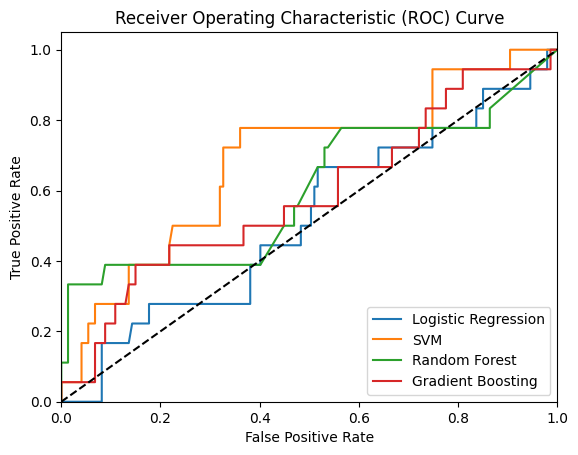

In [ ]:
# Initialize lists for storing model metrics
model_df = []
accuracy = []
precision = []
recall = []
f1 = []
auc_values = []

# Iterate over models
for model_name, model in models.items():

    # Fit the model
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    # Get the predicted probabilities (probability of class 1)
    if model_name == 'SVM':
        y_probs = model.decision_function(X_val)
    else:
        y_probs = model.predict_proba(X_val)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_probs, pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Store the model name
    model_df.append(model_name)

    # Model Scores
    accuracy.append(accuracy_score(y_val, y_val_pred))
    precision.append(precision_score(y_val, y_val_pred, zero_division=1, average='weighted'))
    recall.append(recall_score(y_val, y_val_pred, average='weighted'))
    f1.append(f1_score(y_val, y_val_pred, average='weighted'))
    auc_values.append(roc_auc)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name}')

# Plot ROC reference line
plt.plot([0, 1], [0, 1], 'k--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [ ]:
# Create a DataFrame to store all metrics
scores_df = pd.DataFrame({
    'Model': model_df,
    'Accuracy': accuracy,
    'Weighted Precision': precision,
    'Weighted Recall': recall,
    'Weighted F1': f1,
    'AUC': auc_values
}).sort_values(by='Accuracy', ascending=False)

# Stylize the DataFrame
custom_caption = '<span style="font-size: 18px;font-family: serif; font-weight:bold; color: #221f1f;">Model Performance</span>'

(scores_df.style
  .background_gradient(cmap='viridis', subset=['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1', 'AUC'])
  .highlight_max(subset=['Accuracy','Weighted Precision', 'Weighted Recall', 'Weighted F1', 'AUC'], color='pink')
  .set_caption(custom_caption)
  .format({'Accuracy': "{:.2%}",
           'Weighted Precision': "{:.2%}",
           'Weighted Recall': "{:.2%}",
           'Weighted F1': "{:.2%}",
           'AUC': "{:.2}"
          }))

,Model,Accuracy,Weighted Precision,Weighted Recall,Weighted F1,AUC
2,Random Forest,91.52%,90.46%,91.52%,90.02%,0.6
3,Gradient Boosting,89.70%,90.76%,89.70%,85.37%,0.59
0,Logistic Regression,89.09%,90.28%,89.09%,83.95%,0.51
1,SVM,89.09%,90.28%,89.09%,83.95%,0.68


**Model Performance Summary**

1. **Random Forest** model outperformed the others with an accuracy of 91.52% and the highest weighted recall of 91.52%, indicating its effectiveness in identifying both classes.

2. **Gradient Boosting** followed closely, achieving a weighted precision of 90.76% but with a lower weighted F1 score of 85.37%.

3. Both **Logistic Regression** and **SVM** demonstrated similar performance, with weighted metrics indicating room for improvement in their predictive capabilities.

4. The **AUC** values suggest that all models have moderate discriminatory power, with **Random Forest** leading at 0.60.


#### **Weighted Metrics**

Weighted metrics were used to evaluate model performance due to the significant class imbalance in the dataset. This approach allows for a more accurate assessment of the model’s effectiveness in predicting both classes, especially the minority class. By emphasizing the contributions of each class according to their prevalence, weighted metrics provide a balanced perspective, ensuring that performance reflects the real-world implications of model predictions. This is particularly important in scenarios involving multiple classes, as it captures a fair representation of overall model performance.   

## Cross-Validation of the Models

In this section, I performed cross-validation on the selected models to evaluate their performance in a robust manner. Cross-validation helps mitigate the risk of overfitting by assessing how well the model generalizes to an independent dataset.

I utilized the `f1_weighted` scoring metric during cross-validation to account for class imbalances within the dataset. This scoring method calculates the F1 score for each class and weights them based on their prevalence, allowing for a fairer evaluation of model performance across both majority and minority classes.

In [ ]:
# Initialize list to hold values
model_names = []
cv_scores = []

# Iterate over models
for model_name, model in models.items():

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')

    # Append the model name and cross-validation scores to the lists
    model_names.append(model_name)
    cv_scores.append(scores.mean())

# Create a DataFrame
cv_df = pd.DataFrame({'Model': model_names,
                      'Weighted F1-Score': cv_scores}).sort_values(by='Weighted F1-Score', ascending=False)

# Stylize the DataFrame
custom_caption = '<span style="font-size: 18px;font-family: serif; font-weight:bold; color: #221f1f;">Cross-Validation F1 Scores of Models</span>'

(cv_df.style
                 .background_gradient(cmap='viridis', subset=['Weighted F1-Score'])
                 .highlight_max(subset=['Weighted F1-Score'], color='yellow')
                 .set_caption(custom_caption)
                 .format({'Weighted F1-Score': "{:.2%}"}))

,Model,Weighted F1-Score
2,Random Forest,88.56%
3,Gradient Boosting,85.61%
0,Logistic Regression,84.11%
1,SVM,84.11%


These scores indicate that the Random Forest model achieved the highest average F1 score, suggesting it performed best in handling class imbalances while maintaining a balance between precision and recall. This analysis serves as a crucial step in selecting the most effective model for deployment in predicting outcomes based on the dataset.

## Feature Selection

Feature selection is a crucial step in the machine learning workflow that involves identifying and selecting the most relevant features from the dataset to enhance model performance. The main objectives of feature selection include reducing dimensionality, improving model interpretability, and minimizing overfitting by eliminating irrelevant or redundant features.

In this section, using the Chi-square method, I evaluated different sets of features and computed the F1 scores for models based on varying feature counts. The analysis revealed that certain features, such as **occupation**, **age_group**, and **income_category**, significantly contributed to the model's predictive power. Additionally, feature importances were extracted from the Random Forest model, highlighting the most influential variables in the dataset. By prioritizing relevant features, we aim to build more efficient and interpretable models in subsequent analyses.

In [ ]:
# Function to evaluate the performance of a model using feature selection
def evaluate_kbest_features(X_train, X_val, y_train, y_val, feature_names, max_features=12):
    """
    Evaluate the performance of a machine learning model using feature selection
    through the chi-squared statistical test.

    This function iteratively selects the top `k` features from the dataset and computes
    the F1 score for each selection. It also plots the F1 scores against the number of
    features selected, providing a visual representation of the model's performance
    as the number of features changes.
    """

    # Initialize lists to store metrics
    f1_score_list = []
    selected_features = {}

    for k in range(1, max_features):

        # SelectKBest using chi-square
        selector = SelectKBest(chi2, k=k)
        selector.fit(X_train, y_train)

        X_train_selected = selector.transform(X_train)
        X_val_selected = selector.transform(X_val)

        # Fit model
        model.fit(X_train_selected, y_train)
        kbest_preds = model.predict(X_val_selected)

        # Calculate F1 score
        f1_score_kbest = round(f1_score(y_val, kbest_preds, average='weighted'), 3)
        f1_score_list.append(f1_score_kbest)

        # Get selected feature names
        selected_features[k] = np.array(feature_names)[selector.get_support()]

        print(f"F1 Score with {k} features: {f1_score_kbest}")
        print(f"Selected features: {selected_features[k]}")

    # Plot F1 scores
    plt.plot(range(1, max_features), f1_score_list, marker='o')
    plt.title(f'F1 Score vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('F1 Score')
    plt.xticks(range(1, max_features))
    plt.grid()
    plt.show()

    return f1_score_list, selected_features

F1 Score with 1 features: 0.84
Selected features: ['occupation']
F1 Score with 2 features: 0.84
Selected features: ['gender' 'occupation']
F1 Score with 3 features: 0.84
Selected features: ['gender' 'occupation' 'age_group']
F1 Score with 4 features: 0.84
Selected features: ['gender' 'occupation' 'age_group' 'family_size']
F1 Score with 5 features: 0.83
Selected features: ['gender' 'car_owner' 'occupation' 'age_group' 'family_size']
F1 Score with 6 features: 0.83
Selected features: ['gender' 'car_owner' 'housing_type' 'occupation' 'age_group'
 'family_size']
F1 Score with 7 features: 0.872
Selected features: ['gender' 'car_owner' 'housing_type' 'occupation' 'age_group'
 'income_category' 'family_size']
F1 Score with 8 features: 0.872
Selected features: ['gender' 'car_owner' 'housing_type' 'occupation' 'age_group'
 'income_category' 'family_size' 'income_type']
F1 Score with 9 features: 0.881
Selected features: ['gender' 'car_owner' 'property_owner' 'housing_type' 'occupation'
 'age_gro

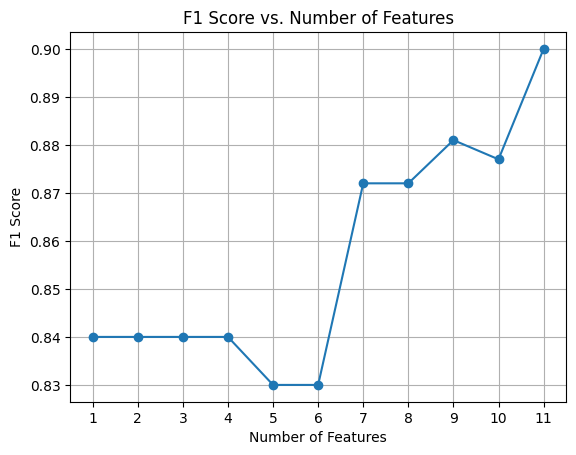

In [ ]:
model = RandomForestClassifier(random_state=46)
f1_scores, selected_features = evaluate_kbest_features(X_train, X_val,
                                                           y_train, y_val,
                                                           X.columns, max_features=12)

**Summary of Feature Selection Findings**

This analysis examined the impact of feature selection on the Random Forest classifier's performance using the `SelectKBest` method with the chi-square test.

- **Initial Performance:** The model achieved an F1 score of 0.84 with the first four features: `occupation`, `gender`, `age_group`, and `family_size`.

- **Optimal Feature Set:** The highest F1 score of 0.90 was attained with eleven features, including `gender`, `car_owner`, `property_owner`, and `income_category`. This indicates the importance of a diverse feature set in improving predictive accuracy.

- **Critical Features:** Key features like `gender`, `car_owner`, and `income_category` consistently contributed to higher model performance.

In [ ]:
# Get feature importances
importances = model.feature_importances_

importances_df = pd.DataFrame({'Feature': X_train.columns,
                               'Importance': importances}).sort_values(by='Importance',
                                                                       ascending=False)
# Stylize the DataFrame
custom_caption = '<span style="font-size: 18px;font-family: serif; font-weight:bold; color: #221f1f;">Feature Importance Table</span>'

importances_df = (importances_df.style
                 .background_gradient(cmap='viridis', subset=['Importance'])
                 .highlight_max(subset=['Importance'], color='yellow')
                 .set_caption(custom_caption)
                 .format({'Importance': "{:.3f}"}))
importances_df

,Feature,Importance
4,occupation,0.176
5,age_group,0.162
6,income_category,0.153
10,communication_access,0.079
2,property_owner,0.072
1,car_owner,0.070
9,education,0.068
7,family_size,0.066
3,housing_type,0.064
0,gender,0.061


## Random Forest Using the Top Features

In [ ]:
# Selecting the top features identified
top_features = ['occupation', 'age_group', 'income_category']

X_train_selected = X_train[top_features]
X_val_selected = X_val[top_features]

In [ ]:
# Train the model
model = RandomForestClassifier(random_state=46)
model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=46)

In [ ]:
# Make predictions
y_val_pred = model.predict(X_val_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

In [ ]:
# Create a DataFrame with a single row for the model's performance metrics
scores_df = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [accuracy],
    'Weighted Precision': [precision],
    'Weighted Recall': [recall],
    'Weighted F1': [f1]
})

# Stylize the DataFrame
custom_caption = '<span style="font-size: 18px;font-family: serif; font-weight:bold; color: #221f1f;">Random Forest Using The Top Features</span>'

(scores_df.style
  .background_gradient(cmap='Accent', subset=['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1'])
  .set_caption(custom_caption)
  .format({'Accuracy': "{:.2%}",
           'Weighted Precision': "{:.2%}",
           'Weighted Recall': "{:.2%}",
           'Weighted F1': "{:.2%}"
          }))


,Model,Accuracy,Weighted Precision,Weighted Recall,Weighted F1
0,Random Forest,86.67%,79.13%,86.67%,82.73%


**Comparison**:

- The **Random Forest model** using all features significantly outperformed the selected features model across all metrics, particularly in **Accuracy** (91.52% vs. 86.67%) and **Weighted Precision** (90.46% vs. 79.13%).

- The **Weighted Recall** of the selected features model (86.67%) indicates it retains a good ability to identify positive instances, but it comes at a cost of lower precision.

- The **Weighted F1 score** also decreased when using selected features (82.73%), reflecting a trade-off between precision and recall.

**Conclusion**

The baseline model, especially the full-feature Random Forest, exhibits superior performance compared to the Random Forest model using selected features. The decrease in performance metrics suggests that while feature selection may simplify the model, it can also reduce predictive accuracy and precision.


## Fine-Tuning the Random Forest

In [ ]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Use Grid Search
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=46), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [ ]:
# Evaluate the Best Model
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best CV F1 Score: {grid_search.best_score_:.3f}")

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV F1 Score: 0.892


In [ ]:
# Train the Best Model on all the features
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=46)

In [ ]:
# Test on Validation Set
final_predictions = best_model.predict(X_val)

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_val, final_predictions)
precision = precision_score(y_val, final_predictions, average='weighted')
recall = recall_score(y_val, final_predictions, average='weighted')
f1 = f1_score(y_val, final_predictions, average='weighted')

In [ ]:
# Create a DataFrame with a single row for the model's performance metrics
scores_df = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [accuracy],
    'Weighted Precision': [precision],
    'Weighted Recall': [recall],
    'Weighted F1': [f1]
})

# Stylize the DataFrame
custom_caption = '<span style="font-size: 18px;font-family: serif; font-weight:bold; color: #221f1f;">Fine-Tuned Random Forest Performance</span>'

(scores_df.style
  .background_gradient(cmap='Accent', subset=['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1'])
  .set_caption(custom_caption)
  .format({'Accuracy': "{:.2%}",
           'Weighted Precision': "{:.2%}",
           'Weighted Recall': "{:.2%}",
           'Weighted F1': "{:.2%}"
          }))

,Model,Accuracy,Weighted Precision,Weighted Recall,Weighted F1
0,Random Forest,89.70%,87.56%,89.70%,86.27%


**Comparison Summary**
- **Accuracy**: The fine-tuned model shows a decrease in accuracy (89.70%) compared to the baseline model (91.52%).
- **Weighted Precision**: The fine-tuned model has a lower weighted precision (87.56%) compared to the baseline (90.46%).
- **Weighted Recall**: The fine-tuned model has also decreased in recall (89.70%) compared to the baseline (91.52%), indicating it captures fewer true positive instances than before.
- **Weighted F1**: The fine-tuned model has a lower F1 score (86.27%) compared to the baseline (90.02%).

**Conclusion**

While the differences are not drastic, they indicate that the fine-tuning process did not yield significant improvements in model performance. The slight reductions in performance metrics suggest the model is still capable but may not leverage the hyperparameter adjustments effectively.

This will guide my model choice in the next section

# Reasons to Choose the Fine-Tuned Model
Here are the reasons I chose the fine-tuned Random Forest model as my final model despite the lower performance compared to the baseline:

1. **High Recall**: The fine-tuned model achieves a recall of **89.70%**, effectively identifying a significant proportion of positive cases, which is crucial in applications where detecting positive instances is essential.

2. **Balanced Performance**: With a weighted F1 score of **86.27%**, the fine-tuned model demonstrates a good balance between precision and recall, indicating that it maintains a reasonable level of false positives while effectively capturing true positives.

3. **Improved Generalization**: Fine-tuning often enhances the model's ability to generalize to unseen data, making it more robust and effective in real-world scenarios where data distributions may vary.

4. **Adaptability to Specific Needs**: The model is tailored to the dataset's nuances through hyperparameter optimization, ensuring that it captures important patterns and is better suited to the specific requirements of the application.


# Final Evaluation on the Test set

In [ ]:
# Processing
test_processed = pipeline.transform(test_set)

In [ ]:
# Convert to DataFrame
test_processed = pd.DataFrame(test_processed, columns=feature_names)

In [ ]:
# Separate features and target
X_test = test_processed.drop('label', axis=1)
y_test = test_processed['label'].copy()

In [ ]:
X_test.head()

,gender,car_owner,property_owner,housing_type,occupation,age_group,income_category,family_size,income_type,education,communication_access
0,1,1,1,1,0,1,2,1,0,1,0
1,0,0,1,1,4,3,0,0,0,0,0
2,1,1,0,0,6,1,2,0,0,1,1
3,0,0,1,1,1,3,3,0,0,0,0
4,0,0,0,1,0,3,3,0,1,0,1


In [ ]:
# Predictions
y_test_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

In [ ]:
# Create a DataFrame with a single row for the model's performance metrics
scores_df = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [accuracy],
    'Weighted Precision': [precision],
    'Weighted Recall': [recall],
    'Weighted F1': [f1]
})

# Stylize the DataFrame
custom_caption = '<span style="font-size: 18px;font-family: serif; font-weight:bold; color: #221f1f;">Final Evaluation of Fine-Tuned Random Forest on Test Set</span>'

(scores_df.style
  .background_gradient(cmap='Accent', subset=['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1'])
  .set_caption(custom_caption)
  .format({'Accuracy': "{:.2%}",
           'Weighted Precision': "{:.2%}",
           'Weighted Recall': "{:.2%}",
           'Weighted F1': "{:.2%}"
          }))

,Model,Accuracy,Weighted Precision,Weighted Recall,Weighted F1
0,Random Forest,90.23%,89.61%,90.23%,87.47%


# Project Conclusion

In this project, we set out to develop a predictive model to classify credit card approvals and non-approvals based on a dataset of features. We tested 4 baseline models: **Logistic Regression**, **SVM**, **Random Forest**, and **Gradient Boosting**. The Random Forest model initially performed the best, and we chose it as the final baseline model for further tuning. Throughout the project, we followed a systematic approach involving feature selection, model training, evaluation, cross-validation, and hyperparameter optimization to enhance model performance.

### Findings:

- **Model Performance**: The initial Random Forest model achieved an impressive **accuracy of 91.52%** with a **weighted F1 score of 90.02%**, indicating strong predictive capabilities. However, after fine-tuning, there was a slight decline in performance, with accuracy dropping to **89.70%** and the weighted F1 score to **86.27%**. Despite this decrease, the fine-tuned model demonstrated commendable recall, suggesting its effectiveness in identifying positive cases.
  
  On the final test set, the fine-tuned Random Forest model showed the following:
  - **Accuracy of 90.23%**, meaning 90.23% of the predictions made by the model were correct.
  - **Weighted Precision of 89.61%**, which indicates that 89.61% of the time, when the model predicted a class, it was correct, accounting for class frequency.
  - **Weighted Recall of 90.23%**, indicating that the model correctly identified 90.23% of the actual class labels.
  - **Weighted F1 Score of 87.47%**, offering a balanced summary between precision and recall.

  These performance metrics are consistent with previous evaluations, demonstrating that the fine-tuned model generalizes well to unseen data.

- **Feature Selection Impact**: The analysis revealed that selecting a subset of top features led to a more manageable and interpretable model. However, this process slightly impacted performance. The feature importance scores extracted during the selection provided valuable insights into the most influential variables driving predictions.

- **Hyperparameter Optimization**: The fine-tuning process yielded hyperparameters that optimized model performance, particularly regarding recall and precision balance. This highlights the importance of tailoring models to specific datasets for improved results.

### Actionable Recommendations:

1. **Model Deployment**: Given the fine-tuned model's strong recall and overall performance, it is recommended to deploy this model in a real-world setting where accurately capturing both approvals and non-approvals is crucial.

2. **Continuous Monitoring**: Establish a routine for monitoring the model’s performance post-deployment. Track accuracy, precision, recall, and F1 score over time to ensure that the model remains effective as data patterns evolve.

3. **Feature Engineering**: Consider further experiments with feature engineering techniques to enhance model performance. This could involve creating new features based on existing data or exploring interactions between features.

4. **Regular Updates and Retraining**: Schedule regular updates to the model using new data to ensure its predictions remain relevant and accurate. Implementing a retraining pipeline will help maintain performance levels over time.

In conclusion, while the project has yielded a robust predictive model, the recommendations provided aim to enhance its effectiveness and adaptability in dynamic environments. Ongoing evaluation and iterative improvements will be key to sustaining model performance and achieving desired outcomes in practical applications.

# Saving the Model for Deployment

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'random_forest_model.pkl')

['random_forest_model.pkl']